In [8]:
import mmmlu_preparer
from mmmlu_preparer.read_mmmlu_dataset import (
    TARGET_SUBTASKS,
    MMMLULanguage,
    create_mmmlu_dataset,
    sample_first_n_data_from_subtask
)
from mmmlu_preparer.query_formats import (
    InputFormat,
    OutputFormat,
    ShuffleMethod,
    get_current_queries
)


model_list = ['gemini-2.0-flash', 'mistral-small-2503', 'llama-v3p1-8b-instruct']
lang_list = list(MMMLULanguage)
input_output_list = [('base', 'base'), ('base', 'json-full'), ('base', 'xml-full'),('json', 'base'),('json', 'json-full'),('json', 'xml-full'), ('xml', 'base'),('xml', 'json-full'),('xml', 'xml-full')]
shuffle_list = list(ShuffleMethod)

In [9]:
import pandas as pd

# Format

# experiment_save_dict = {
#     "Model": "",
#     "Language": "",
#     "Subtask": "",
#     "Question id in subtask": "",
#     "Shuffle method": "",
#     "Original to shuffled": "",
#     "Input format": "",
#     "Output format": "",
#     "Query": "",
#     "Original correct answer": "",
#     "Shuffled correct answer": "",
#     "Response answer": "",
#     "Model output": "",  # Output text only
# }

In [10]:
from itertools import product
from tqdm.auto import tqdm
from collections import defaultdict

chosen_subtasks = TARGET_SUBTASKS
combinations = list(product(model_list, input_output_list, shuffle_list))
merged_result_dict = defaultdict(list) # "model_name:"

for lang_enum in lang_list:
    mmmlu_ds = create_mmmlu_dataset(lang_enum)
    chosen_subtasks = TARGET_SUBTASKS
    mmmlu_subset = sample_first_n_data_from_subtask(mmmlu_ds, chosen_subtasks)
    for curr_combo in tqdm(combinations):
        model_name, format_tuple, shuffle_method_enum = curr_combo
        input_format, output_format = format_tuple
        lang_string = lang_enum.value.lower().replace("_", "-")
        shuffle_method = shuffle_method_enum.name.lower().replace("_", "-")
        log_file_name = f"{model_name}_{lang_string}_{input_format}_input_{output_format}_output_{shuffle_method}_shuffle.jsonl"
        print(log_file_name)
        input_format_enum = InputFormat(input_format.replace("-", "_"))
        output_format_enum = OutputFormat[output_format.replace("-", "_").upper()]

100%|██████████| 162/162 [00:00<00:00, 173291.83it/s]


gemini-2.0-flash_en_base_input_base_output_default_shuffle.jsonl
gemini-2.0-flash_en_base_input_base_output_reverse_shuffle.jsonl
gemini-2.0-flash_en_base_input_base_output_longest-first_shuffle.jsonl
gemini-2.0-flash_en_base_input_base_output_shortest-first_shuffle.jsonl
gemini-2.0-flash_en_base_input_base_output_most-kana-ratio_shuffle.jsonl
gemini-2.0-flash_en_base_input_base_output_fewest-kana-ratio_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_default_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_reverse_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_longest-first_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_shortest-first_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_most-kana-ratio_shuffle.jsonl
gemini-2.0-flash_en_base_input_json-full_output_fewest-kana-ratio_shuffle.jsonl
gemini-2.0-flash_en_base_input_xml-full_output_default_shuffle.jsonl
gemini-2.0-flash_en_base_input_xml-full_output_reverse_shuf

100%|██████████| 162/162 [00:00<00:00, 138980.82it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_default_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_base_output_reverse_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_base_output_longest-first_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_base_output_shortest-first_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_base_output_most-kana-ratio_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_base_output_fewest-kana-ratio_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_default_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_reverse_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_longest-first_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_shortest-first_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_most-kana-ratio_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_json-full_output_fewest-kana-ratio_shuffle.jsonl
gemini-2.0-flash_ja-jp_base_input_xml-full_output_default_shuffle.jsonl
gemini-2.0-flash_ja-

In [11]:
import json
from collections import defaultdict
from itertools import product
from pathlib import Path
from tqdm.auto import tqdm
import mmmlu_preparer
from mmmlu_preparer.answer_extract import extract_answer_from_response


chosen_subtasks = TARGET_SUBTASKS
combinations = list(product(model_list, input_output_list, shuffle_list))
merged_result_dict = defaultdict(list) # "model_name:"

for lang_enum in lang_list:
    mmmlu_ds = create_mmmlu_dataset(lang_enum)
    chosen_subtasks = TARGET_SUBTASKS
    mmmlu_subset = sample_first_n_data_from_subtask(mmmlu_ds, chosen_subtasks)

    for curr_combo in tqdm(combinations):
        model_name, format_tuple, shuffle_method_enum = curr_combo
        if lang_enum is MMMLULanguage.EN and shuffle_method_enum in [ShuffleMethod.MOST_KANA_RATIO, ShuffleMethod.FEWEST_KANA_RATIO]:
            continue
        input_format, output_format = format_tuple
        lang_string = lang_enum.value.lower().replace("_", "-")
        shuffle_method = shuffle_method_enum.name.lower().replace("_", "-")
        log_file_name = f"{model_name}_{lang_string}_{input_format}_input_{output_format}_output_{shuffle_method}_shuffle.jsonl"
        print(log_file_name)

        input_format_enum = InputFormat(input_format.replace("-", "_"))
        output_format_enum = OutputFormat[output_format.replace("-", "_").upper()]

        curr_queries = get_current_queries(mmmlu_subset,
                                            lang_enum,
                                            chosen_subtasks,
                                            input_format_enum,
                                            output_format_enum,
                                            shuffle_method_enum,
                                            )

        log_path = Path(f"./mmmlu_output/{log_file_name}")
        if log_path.exists():
            with log_path.open('r', encoding='utf-8') as file:
                for idx, line in enumerate(file):
                    curr_query = curr_queries[idx]
                    curr_result_dict = {}
                    response_dict = json.loads(line.strip())
                    response = response_dict['kwargs']['content']
                    extracted_answer = extract_answer_from_response(response)

                    curr_result_dict['Model'] = model_name
                    curr_result_dict['Language'] = lang_string
                    curr_result_dict['Subtask'] = curr_query['Subtask']
                    curr_result_dict['Question id in subtask'] = curr_query['Question id in subtask']
                    curr_result_dict['Shuffle method'] = shuffle_method
                    curr_result_dict['Original to shuffled'] = curr_query['Original to shuffled']
                    curr_result_dict['Input format'] = input_format
                    curr_result_dict['Output format'] = output_format
                    curr_result_dict['Query'] = curr_query['Query']
                    curr_result_dict['Original correct answer'] = curr_query['Original correct answer']
                    curr_result_dict['Shuffled correct answer'] = curr_query['Shuffled correct answer']
                    curr_result_dict['Response answer'] = extracted_answer
                    curr_result_dict['Model output'] = response
                    if model_name == 'llama-v3p1-8b-instruct':
                        curr_result_dict['logprobs'] = response_dict['kwargs']['response_metadata']['logprobs']
                    else:
                        curr_result_dict['logprobs'] = []
                        
                    merged_result_dict[model_name].append(curr_result_dict)

experiment_dfs = [pd.DataFrame(val_list) for val_list in merged_result_dict.values()]

  0%|          | 0/162 [00:00<?, ?it/s]

gemini-2.0-flash_en_base_input_base_output_default_shuffle.jsonl


  1%|          | 1/162 [00:01<02:57,  1.11s/it]

gemini-2.0-flash_en_base_input_base_output_reverse_shuffle.jsonl


  1%|          | 2/162 [00:02<03:04,  1.15s/it]

gemini-2.0-flash_en_base_input_base_output_longest-first_shuffle.jsonl


  2%|▏         | 3/162 [00:03<03:17,  1.24s/it]

gemini-2.0-flash_en_base_input_base_output_shortest-first_shuffle.jsonl


  2%|▏         | 4/162 [00:04<03:09,  1.20s/it]

gemini-2.0-flash_en_base_input_json-full_output_default_shuffle.jsonl


  4%|▍         | 7/162 [00:05<01:48,  1.43it/s]

gemini-2.0-flash_en_base_input_json-full_output_reverse_shuffle.jsonl


  5%|▍         | 8/162 [00:07<02:05,  1.22it/s]

gemini-2.0-flash_en_base_input_json-full_output_longest-first_shuffle.jsonl


  6%|▌         | 9/162 [00:08<02:21,  1.08it/s]

gemini-2.0-flash_en_base_input_json-full_output_shortest-first_shuffle.jsonl


  6%|▌         | 10/162 [00:09<02:34,  1.02s/it]

gemini-2.0-flash_en_base_input_xml-full_output_default_shuffle.jsonl


  8%|▊         | 13/162 [00:10<01:39,  1.50it/s]

gemini-2.0-flash_en_base_input_xml-full_output_reverse_shuffle.jsonl


  9%|▊         | 14/162 [00:11<01:50,  1.34it/s]

gemini-2.0-flash_en_base_input_xml-full_output_longest-first_shuffle.jsonl


  9%|▉         | 15/162 [00:12<02:00,  1.22it/s]

gemini-2.0-flash_en_base_input_xml-full_output_shortest-first_shuffle.jsonl


 10%|▉         | 16/162 [00:14<02:09,  1.13it/s]

gemini-2.0-flash_en_json_input_base_output_default_shuffle.jsonl


 12%|█▏        | 19/162 [00:15<01:28,  1.61it/s]

gemini-2.0-flash_en_json_input_base_output_reverse_shuffle.jsonl


 12%|█▏        | 20/162 [00:16<01:40,  1.41it/s]

gemini-2.0-flash_en_json_input_base_output_longest-first_shuffle.jsonl


 13%|█▎        | 21/162 [00:17<01:53,  1.24it/s]

gemini-2.0-flash_en_json_input_base_output_shortest-first_shuffle.jsonl


 14%|█▎        | 22/162 [00:18<02:03,  1.13it/s]

gemini-2.0-flash_en_json_input_json-full_output_default_shuffle.jsonl


 15%|█▌        | 25/162 [00:19<01:29,  1.54it/s]

gemini-2.0-flash_en_json_input_json-full_output_reverse_shuffle.jsonl


 16%|█▌        | 26/162 [00:21<01:45,  1.29it/s]

gemini-2.0-flash_en_json_input_json-full_output_longest-first_shuffle.jsonl


 17%|█▋        | 27/162 [00:22<02:04,  1.08it/s]

gemini-2.0-flash_en_json_input_json-full_output_shortest-first_shuffle.jsonl


 17%|█▋        | 28/162 [00:23<02:15,  1.01s/it]

gemini-2.0-flash_en_json_input_xml-full_output_default_shuffle.jsonl


 19%|█▉        | 31/162 [00:24<01:29,  1.46it/s]

gemini-2.0-flash_en_json_input_xml-full_output_reverse_shuffle.jsonl


 20%|█▉        | 32/162 [00:25<01:39,  1.31it/s]

gemini-2.0-flash_en_json_input_xml-full_output_longest-first_shuffle.jsonl


 20%|██        | 33/162 [00:27<01:49,  1.18it/s]

gemini-2.0-flash_en_json_input_xml-full_output_shortest-first_shuffle.jsonl


 21%|██        | 34/162 [00:28<01:57,  1.09it/s]

gemini-2.0-flash_en_xml_input_base_output_default_shuffle.jsonl


 23%|██▎       | 37/162 [00:29<01:21,  1.53it/s]

gemini-2.0-flash_en_xml_input_base_output_reverse_shuffle.jsonl


 23%|██▎       | 38/162 [00:30<01:33,  1.33it/s]

gemini-2.0-flash_en_xml_input_base_output_longest-first_shuffle.jsonl


 24%|██▍       | 39/162 [00:31<01:44,  1.18it/s]

gemini-2.0-flash_en_xml_input_base_output_shortest-first_shuffle.jsonl


 25%|██▍       | 40/162 [00:33<01:53,  1.07it/s]

gemini-2.0-flash_en_xml_input_json-full_output_default_shuffle.jsonl


 27%|██▋       | 43/162 [00:34<01:17,  1.54it/s]

gemini-2.0-flash_en_xml_input_json-full_output_reverse_shuffle.jsonl


 27%|██▋       | 44/162 [00:35<01:27,  1.35it/s]

gemini-2.0-flash_en_xml_input_json-full_output_longest-first_shuffle.jsonl


 28%|██▊       | 45/162 [00:36<01:37,  1.20it/s]

gemini-2.0-flash_en_xml_input_json-full_output_shortest-first_shuffle.jsonl


 28%|██▊       | 46/162 [00:37<01:45,  1.10it/s]

gemini-2.0-flash_en_xml_input_xml-full_output_default_shuffle.jsonl


 30%|███       | 49/162 [00:38<01:12,  1.55it/s]

gemini-2.0-flash_en_xml_input_xml-full_output_reverse_shuffle.jsonl


 31%|███       | 50/162 [00:39<01:23,  1.35it/s]

gemini-2.0-flash_en_xml_input_xml-full_output_longest-first_shuffle.jsonl


 31%|███▏      | 51/162 [00:41<01:36,  1.15it/s]

gemini-2.0-flash_en_xml_input_xml-full_output_shortest-first_shuffle.jsonl


 32%|███▏      | 52/162 [00:42<01:43,  1.06it/s]

mistral-small-2503_en_base_input_base_output_default_shuffle.jsonl


 34%|███▍      | 55/162 [00:43<01:09,  1.54it/s]

mistral-small-2503_en_base_input_base_output_reverse_shuffle.jsonl


 35%|███▍      | 56/162 [00:44<01:17,  1.36it/s]

mistral-small-2503_en_base_input_base_output_longest-first_shuffle.jsonl


 35%|███▌      | 57/162 [00:45<01:25,  1.22it/s]

mistral-small-2503_en_base_input_base_output_shortest-first_shuffle.jsonl


 36%|███▌      | 58/162 [00:46<01:32,  1.13it/s]

mistral-small-2503_en_base_input_json-full_output_default_shuffle.jsonl


 38%|███▊      | 61/162 [00:47<01:04,  1.57it/s]

mistral-small-2503_en_base_input_json-full_output_reverse_shuffle.jsonl


 38%|███▊      | 62/162 [00:49<01:14,  1.34it/s]

mistral-small-2503_en_base_input_json-full_output_longest-first_shuffle.jsonl


 39%|███▉      | 63/162 [00:50<01:24,  1.17it/s]

mistral-small-2503_en_base_input_json-full_output_shortest-first_shuffle.jsonl


 40%|███▉      | 64/162 [00:51<01:31,  1.07it/s]

mistral-small-2503_en_base_input_xml-full_output_default_shuffle.jsonl


 41%|████▏     | 67/162 [00:52<01:00,  1.56it/s]

mistral-small-2503_en_base_input_xml-full_output_reverse_shuffle.jsonl


 42%|████▏     | 68/162 [00:53<01:07,  1.39it/s]

mistral-small-2503_en_base_input_xml-full_output_longest-first_shuffle.jsonl


 43%|████▎     | 69/162 [00:54<01:14,  1.25it/s]

mistral-small-2503_en_base_input_xml-full_output_shortest-first_shuffle.jsonl


 43%|████▎     | 70/162 [00:55<01:20,  1.15it/s]

mistral-small-2503_en_json_input_base_output_default_shuffle.jsonl


 45%|████▌     | 73/162 [00:57<00:55,  1.61it/s]

mistral-small-2503_en_json_input_base_output_reverse_shuffle.jsonl


 46%|████▌     | 74/162 [00:58<01:03,  1.39it/s]

mistral-small-2503_en_json_input_base_output_longest-first_shuffle.jsonl


 46%|████▋     | 75/162 [00:59<01:10,  1.23it/s]

mistral-small-2503_en_json_input_base_output_shortest-first_shuffle.jsonl


 47%|████▋     | 76/162 [01:00<01:18,  1.09it/s]

mistral-small-2503_en_json_input_json-full_output_default_shuffle.jsonl


 49%|████▉     | 79/162 [01:01<00:55,  1.49it/s]

mistral-small-2503_en_json_input_json-full_output_reverse_shuffle.jsonl


 49%|████▉     | 80/162 [01:03<01:07,  1.22it/s]

mistral-small-2503_en_json_input_json-full_output_longest-first_shuffle.jsonl


 50%|█████     | 81/162 [01:04<01:14,  1.09it/s]

mistral-small-2503_en_json_input_json-full_output_shortest-first_shuffle.jsonl


 51%|█████     | 82/162 [01:05<01:19,  1.00it/s]

mistral-small-2503_en_json_input_xml-full_output_default_shuffle.jsonl


 52%|█████▏    | 85/162 [01:06<00:52,  1.48it/s]

mistral-small-2503_en_json_input_xml-full_output_reverse_shuffle.jsonl


 53%|█████▎    | 86/162 [01:07<00:57,  1.32it/s]

mistral-small-2503_en_json_input_xml-full_output_longest-first_shuffle.jsonl


 54%|█████▎    | 87/162 [01:09<01:03,  1.19it/s]

mistral-small-2503_en_json_input_xml-full_output_shortest-first_shuffle.jsonl


 54%|█████▍    | 88/162 [01:10<01:07,  1.10it/s]

mistral-small-2503_en_xml_input_base_output_default_shuffle.jsonl


 56%|█████▌    | 91/162 [01:11<00:45,  1.55it/s]

mistral-small-2503_en_xml_input_base_output_reverse_shuffle.jsonl


 57%|█████▋    | 92/162 [01:12<00:52,  1.33it/s]

mistral-small-2503_en_xml_input_base_output_longest-first_shuffle.jsonl


 57%|█████▋    | 93/162 [01:13<00:58,  1.18it/s]

mistral-small-2503_en_xml_input_base_output_shortest-first_shuffle.jsonl


 58%|█████▊    | 94/162 [01:14<01:03,  1.07it/s]

mistral-small-2503_en_xml_input_json-full_output_default_shuffle.jsonl


 60%|█████▉    | 97/162 [01:16<00:42,  1.54it/s]

mistral-small-2503_en_xml_input_json-full_output_reverse_shuffle.jsonl


 60%|██████    | 98/162 [01:17<00:47,  1.35it/s]

mistral-small-2503_en_xml_input_json-full_output_longest-first_shuffle.jsonl


 61%|██████    | 99/162 [01:18<00:52,  1.20it/s]

mistral-small-2503_en_xml_input_json-full_output_shortest-first_shuffle.jsonl


 62%|██████▏   | 100/162 [01:19<00:56,  1.10it/s]

mistral-small-2503_en_xml_input_xml-full_output_default_shuffle.jsonl


 64%|██████▎   | 103/162 [01:20<00:37,  1.59it/s]

mistral-small-2503_en_xml_input_xml-full_output_reverse_shuffle.jsonl


 64%|██████▍   | 104/162 [01:21<00:40,  1.43it/s]

mistral-small-2503_en_xml_input_xml-full_output_longest-first_shuffle.jsonl


 65%|██████▍   | 105/162 [01:22<00:43,  1.30it/s]

mistral-small-2503_en_xml_input_xml-full_output_shortest-first_shuffle.jsonl


 65%|██████▌   | 106/162 [01:23<00:46,  1.19it/s]

llama-v3p1-8b-instruct_en_base_input_base_output_default_shuffle.jsonl


 67%|██████▋   | 109/162 [01:24<00:30,  1.73it/s]

llama-v3p1-8b-instruct_en_base_input_base_output_reverse_shuffle.jsonl


 68%|██████▊   | 110/162 [01:25<00:35,  1.45it/s]

llama-v3p1-8b-instruct_en_base_input_base_output_longest-first_shuffle.jsonl


 69%|██████▊   | 111/162 [01:26<00:38,  1.34it/s]

llama-v3p1-8b-instruct_en_base_input_base_output_shortest-first_shuffle.jsonl


 69%|██████▉   | 112/162 [01:27<00:40,  1.24it/s]

llama-v3p1-8b-instruct_en_base_input_json-full_output_default_shuffle.jsonl


 71%|███████   | 115/162 [01:28<00:27,  1.68it/s]

llama-v3p1-8b-instruct_en_base_input_json-full_output_reverse_shuffle.jsonl


 72%|███████▏  | 116/162 [01:29<00:31,  1.46it/s]

llama-v3p1-8b-instruct_en_base_input_json-full_output_longest-first_shuffle.jsonl


 72%|███████▏  | 117/162 [01:30<00:33,  1.35it/s]

llama-v3p1-8b-instruct_en_base_input_json-full_output_shortest-first_shuffle.jsonl


 73%|███████▎  | 118/162 [01:31<00:36,  1.22it/s]

llama-v3p1-8b-instruct_en_base_input_xml-full_output_default_shuffle.jsonl


 75%|███████▍  | 121/162 [01:33<00:23,  1.71it/s]

llama-v3p1-8b-instruct_en_base_input_xml-full_output_reverse_shuffle.jsonl


 75%|███████▌  | 122/162 [01:34<00:27,  1.48it/s]

llama-v3p1-8b-instruct_en_base_input_xml-full_output_longest-first_shuffle.jsonl


 76%|███████▌  | 123/162 [01:35<00:28,  1.36it/s]

llama-v3p1-8b-instruct_en_base_input_xml-full_output_shortest-first_shuffle.jsonl


 77%|███████▋  | 124/162 [01:36<00:31,  1.21it/s]

llama-v3p1-8b-instruct_en_json_input_base_output_default_shuffle.jsonl


 78%|███████▊  | 127/162 [01:37<00:20,  1.73it/s]

llama-v3p1-8b-instruct_en_json_input_base_output_reverse_shuffle.jsonl


 79%|███████▉  | 128/162 [01:38<00:22,  1.51it/s]

llama-v3p1-8b-instruct_en_json_input_base_output_longest-first_shuffle.jsonl


 80%|███████▉  | 129/162 [01:39<00:24,  1.37it/s]

llama-v3p1-8b-instruct_en_json_input_base_output_shortest-first_shuffle.jsonl


 80%|████████  | 130/162 [01:40<00:25,  1.24it/s]

llama-v3p1-8b-instruct_en_json_input_json-full_output_default_shuffle.jsonl


 82%|████████▏ | 133/162 [01:41<00:16,  1.72it/s]

llama-v3p1-8b-instruct_en_json_input_json-full_output_reverse_shuffle.jsonl


 83%|████████▎ | 134/162 [01:42<00:19,  1.47it/s]

llama-v3p1-8b-instruct_en_json_input_json-full_output_longest-first_shuffle.jsonl


 83%|████████▎ | 135/162 [01:43<00:20,  1.34it/s]

llama-v3p1-8b-instruct_en_json_input_json-full_output_shortest-first_shuffle.jsonl


 84%|████████▍ | 136/162 [01:44<00:21,  1.20it/s]

llama-v3p1-8b-instruct_en_json_input_xml-full_output_default_shuffle.jsonl


 86%|████████▌ | 139/162 [01:45<00:13,  1.67it/s]

llama-v3p1-8b-instruct_en_json_input_xml-full_output_reverse_shuffle.jsonl


 86%|████████▋ | 140/162 [01:46<00:15,  1.44it/s]

llama-v3p1-8b-instruct_en_json_input_xml-full_output_longest-first_shuffle.jsonl


 87%|████████▋ | 141/162 [01:47<00:17,  1.23it/s]

llama-v3p1-8b-instruct_en_json_input_xml-full_output_shortest-first_shuffle.jsonl


 88%|████████▊ | 142/162 [01:49<00:17,  1.12it/s]

llama-v3p1-8b-instruct_en_xml_input_base_output_default_shuffle.jsonl


 90%|████████▉ | 145/162 [01:50<00:10,  1.61it/s]

llama-v3p1-8b-instruct_en_xml_input_base_output_reverse_shuffle.jsonl


 90%|█████████ | 146/162 [01:51<00:11,  1.43it/s]

llama-v3p1-8b-instruct_en_xml_input_base_output_longest-first_shuffle.jsonl


 91%|█████████ | 147/162 [01:52<00:11,  1.29it/s]

llama-v3p1-8b-instruct_en_xml_input_base_output_shortest-first_shuffle.jsonl


 91%|█████████▏| 148/162 [01:53<00:11,  1.18it/s]

llama-v3p1-8b-instruct_en_xml_input_json-full_output_default_shuffle.jsonl


 93%|█████████▎| 151/162 [01:54<00:06,  1.64it/s]

llama-v3p1-8b-instruct_en_xml_input_json-full_output_reverse_shuffle.jsonl


 94%|█████████▍| 152/162 [01:55<00:07,  1.41it/s]

llama-v3p1-8b-instruct_en_xml_input_json-full_output_longest-first_shuffle.jsonl


 94%|█████████▍| 153/162 [01:56<00:07,  1.28it/s]

llama-v3p1-8b-instruct_en_xml_input_json-full_output_shortest-first_shuffle.jsonl


 95%|█████████▌| 154/162 [01:57<00:06,  1.15it/s]

llama-v3p1-8b-instruct_en_xml_input_xml-full_output_default_shuffle.jsonl


 97%|█████████▋| 157/162 [01:58<00:03,  1.63it/s]

llama-v3p1-8b-instruct_en_xml_input_xml-full_output_reverse_shuffle.jsonl


 98%|█████████▊| 158/162 [01:59<00:02,  1.40it/s]

llama-v3p1-8b-instruct_en_xml_input_xml-full_output_longest-first_shuffle.jsonl


 98%|█████████▊| 159/162 [02:00<00:02,  1.28it/s]

llama-v3p1-8b-instruct_en_xml_input_xml-full_output_shortest-first_shuffle.jsonl


  0%|          | 0/162 [00:00<?, ?it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_default_shuffle.jsonl


  1%|          | 1/162 [00:00<00:39,  4.08it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_reverse_shuffle.jsonl


  1%|          | 2/162 [00:00<00:40,  3.97it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_longest-first_shuffle.jsonl


  2%|▏         | 3/162 [00:00<00:43,  3.64it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_shortest-first_shuffle.jsonl


  2%|▏         | 4/162 [00:01<00:43,  3.59it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_most-kana-ratio_shuffle.jsonl


  3%|▎         | 5/162 [00:01<00:45,  3.47it/s]

gemini-2.0-flash_ja-jp_base_input_base_output_fewest-kana-ratio_shuffle.jsonl


  4%|▎         | 6/162 [00:01<00:45,  3.43it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_default_shuffle.jsonl


  4%|▍         | 7/162 [00:02<00:48,  3.19it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_reverse_shuffle.jsonl


  5%|▍         | 8/162 [00:02<00:50,  3.02it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_longest-first_shuffle.jsonl


  6%|▌         | 9/162 [00:02<00:54,  2.83it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_shortest-first_shuffle.jsonl


  6%|▌         | 10/162 [00:03<00:55,  2.74it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_most-kana-ratio_shuffle.jsonl


  7%|▋         | 11/162 [00:03<00:57,  2.65it/s]

gemini-2.0-flash_ja-jp_base_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


  7%|▋         | 12/162 [00:04<01:10,  2.14it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_default_shuffle.jsonl


  8%|▊         | 13/162 [00:04<00:57,  2.58it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_reverse_shuffle.jsonl


  9%|▊         | 14/162 [00:04<00:49,  2.98it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_longest-first_shuffle.jsonl


  9%|▉         | 15/162 [00:04<00:45,  3.24it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_shortest-first_shuffle.jsonl


 10%|▉         | 16/162 [00:05<00:42,  3.43it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 10%|█         | 17/162 [00:05<00:40,  3.57it/s]

gemini-2.0-flash_ja-jp_base_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 11%|█         | 18/162 [00:05<00:39,  3.66it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_default_shuffle.jsonl


 12%|█▏        | 19/162 [00:05<00:37,  3.80it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_reverse_shuffle.jsonl


 12%|█▏        | 20/162 [00:06<00:37,  3.80it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_longest-first_shuffle.jsonl


 13%|█▎        | 21/162 [00:06<00:38,  3.70it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_shortest-first_shuffle.jsonl


 14%|█▎        | 22/162 [00:06<00:38,  3.65it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_most-kana-ratio_shuffle.jsonl


 14%|█▍        | 23/162 [00:07<00:38,  3.57it/s]

gemini-2.0-flash_ja-jp_json_input_base_output_fewest-kana-ratio_shuffle.jsonl


 15%|█▍        | 24/162 [00:07<00:39,  3.51it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_default_shuffle.jsonl


 15%|█▌        | 25/162 [00:07<00:43,  3.12it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_reverse_shuffle.jsonl


 16%|█▌        | 26/162 [00:08<00:46,  2.90it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_longest-first_shuffle.jsonl


 17%|█▋        | 27/162 [00:08<00:50,  2.70it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_shortest-first_shuffle.jsonl


 17%|█▋        | 28/162 [00:09<00:52,  2.54it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_most-kana-ratio_shuffle.jsonl


 18%|█▊        | 29/162 [00:09<00:54,  2.42it/s]

gemini-2.0-flash_ja-jp_json_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 19%|█▊        | 30/162 [00:09<00:56,  2.34it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_default_shuffle.jsonl


 19%|█▉        | 31/162 [00:10<00:50,  2.60it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_reverse_shuffle.jsonl


 20%|█▉        | 32/162 [00:10<00:45,  2.86it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_longest-first_shuffle.jsonl


 20%|██        | 33/162 [00:10<00:42,  3.04it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_shortest-first_shuffle.jsonl


 21%|██        | 34/162 [00:11<00:40,  3.17it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 22%|██▏       | 35/162 [00:11<00:39,  3.23it/s]

gemini-2.0-flash_ja-jp_json_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 22%|██▏       | 36/162 [00:11<00:39,  3.23it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_default_shuffle.jsonl


 23%|██▎       | 37/162 [00:12<00:38,  3.25it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_reverse_shuffle.jsonl


 23%|██▎       | 38/162 [00:12<00:38,  3.22it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_longest-first_shuffle.jsonl


 24%|██▍       | 39/162 [00:12<00:39,  3.13it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_shortest-first_shuffle.jsonl


 25%|██▍       | 40/162 [00:13<00:40,  3.02it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_most-kana-ratio_shuffle.jsonl


 25%|██▌       | 41/162 [00:13<00:40,  2.95it/s]

gemini-2.0-flash_ja-jp_xml_input_base_output_fewest-kana-ratio_shuffle.jsonl


 26%|██▌       | 42/162 [00:13<00:41,  2.91it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_default_shuffle.jsonl


 27%|██▋       | 43/162 [00:14<00:38,  3.11it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_reverse_shuffle.jsonl


 27%|██▋       | 44/162 [00:14<00:36,  3.19it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_longest-first_shuffle.jsonl


 28%|██▊       | 45/162 [00:14<00:36,  3.21it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_shortest-first_shuffle.jsonl


 28%|██▊       | 46/162 [00:14<00:36,  3.22it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_most-kana-ratio_shuffle.jsonl


 29%|██▉       | 47/162 [00:15<00:36,  3.19it/s]

gemini-2.0-flash_ja-jp_xml_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 30%|██▉       | 48/162 [00:15<00:36,  3.13it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_default_shuffle.jsonl


 30%|███       | 49/162 [00:15<00:34,  3.29it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_reverse_shuffle.jsonl


 31%|███       | 50/162 [00:16<00:33,  3.37it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_longest-first_shuffle.jsonl


 31%|███▏      | 51/162 [00:16<00:33,  3.34it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_shortest-first_shuffle.jsonl


 32%|███▏      | 52/162 [00:16<00:33,  3.29it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 33%|███▎      | 53/162 [00:17<00:33,  3.21it/s]

gemini-2.0-flash_ja-jp_xml_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 33%|███▎      | 54/162 [00:17<00:34,  3.17it/s]

mistral-small-2503_ja-jp_base_input_base_output_default_shuffle.jsonl


 34%|███▍      | 55/162 [00:17<00:31,  3.45it/s]

mistral-small-2503_ja-jp_base_input_base_output_reverse_shuffle.jsonl


 35%|███▍      | 56/162 [00:17<00:29,  3.62it/s]

mistral-small-2503_ja-jp_base_input_base_output_longest-first_shuffle.jsonl


 35%|███▌      | 57/162 [00:18<00:29,  3.57it/s]

mistral-small-2503_ja-jp_base_input_base_output_shortest-first_shuffle.jsonl


 36%|███▌      | 58/162 [00:18<00:29,  3.57it/s]

mistral-small-2503_ja-jp_base_input_base_output_most-kana-ratio_shuffle.jsonl


 36%|███▋      | 59/162 [00:19<00:37,  2.73it/s]

mistral-small-2503_ja-jp_base_input_base_output_fewest-kana-ratio_shuffle.jsonl


 37%|███▋      | 60/162 [00:19<00:35,  2.88it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_default_shuffle.jsonl


 38%|███▊      | 61/162 [00:19<00:35,  2.87it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_reverse_shuffle.jsonl


 38%|███▊      | 62/162 [00:20<00:35,  2.84it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_longest-first_shuffle.jsonl


 39%|███▉      | 63/162 [00:20<00:35,  2.76it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_shortest-first_shuffle.jsonl


 40%|███▉      | 64/162 [00:20<00:35,  2.73it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_most-kana-ratio_shuffle.jsonl


 40%|████      | 65/162 [00:21<00:36,  2.68it/s]

mistral-small-2503_ja-jp_base_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 41%|████      | 66/162 [00:21<00:36,  2.66it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_default_shuffle.jsonl


 41%|████▏     | 67/162 [00:21<00:30,  3.07it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_reverse_shuffle.jsonl


 42%|████▏     | 68/162 [00:21<00:27,  3.37it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_longest-first_shuffle.jsonl


 43%|████▎     | 69/162 [00:22<00:26,  3.55it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_shortest-first_shuffle.jsonl


 43%|████▎     | 70/162 [00:22<00:24,  3.70it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 44%|████▍     | 71/162 [00:22<00:24,  3.76it/s]

mistral-small-2503_ja-jp_base_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 44%|████▍     | 72/162 [00:22<00:23,  3.79it/s]

mistral-small-2503_ja-jp_json_input_base_output_default_shuffle.jsonl


 45%|████▌     | 73/162 [00:23<00:23,  3.85it/s]

mistral-small-2503_ja-jp_json_input_base_output_reverse_shuffle.jsonl


 46%|████▌     | 74/162 [00:23<00:22,  3.87it/s]

mistral-small-2503_ja-jp_json_input_base_output_longest-first_shuffle.jsonl


 46%|████▋     | 75/162 [00:23<00:23,  3.77it/s]

mistral-small-2503_ja-jp_json_input_base_output_shortest-first_shuffle.jsonl


 47%|████▋     | 76/162 [00:24<00:23,  3.69it/s]

mistral-small-2503_ja-jp_json_input_base_output_most-kana-ratio_shuffle.jsonl


 48%|████▊     | 77/162 [00:24<00:23,  3.59it/s]

mistral-small-2503_ja-jp_json_input_base_output_fewest-kana-ratio_shuffle.jsonl


 48%|████▊     | 78/162 [00:24<00:24,  3.48it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_default_shuffle.jsonl


 49%|████▉     | 79/162 [00:25<00:25,  3.21it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_reverse_shuffle.jsonl


 49%|████▉     | 80/162 [00:25<00:27,  3.02it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_longest-first_shuffle.jsonl


 50%|█████     | 81/162 [00:25<00:28,  2.82it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_shortest-first_shuffle.jsonl


 51%|█████     | 82/162 [00:26<00:29,  2.69it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_most-kana-ratio_shuffle.jsonl


 51%|█████     | 83/162 [00:26<00:30,  2.58it/s]

mistral-small-2503_ja-jp_json_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 52%|█████▏    | 84/162 [00:27<00:31,  2.50it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_default_shuffle.jsonl


 52%|█████▏    | 85/162 [00:27<00:27,  2.81it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_reverse_shuffle.jsonl


 53%|█████▎    | 86/162 [00:27<00:24,  3.07it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_longest-first_shuffle.jsonl


 54%|█████▎    | 87/162 [00:27<00:23,  3.20it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_shortest-first_shuffle.jsonl


 54%|█████▍    | 88/162 [00:28<00:22,  3.30it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 55%|█████▍    | 89/162 [00:28<00:22,  3.30it/s]

mistral-small-2503_ja-jp_json_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 56%|█████▌    | 90/162 [00:28<00:21,  3.30it/s]

mistral-small-2503_ja-jp_xml_input_base_output_default_shuffle.jsonl


 56%|█████▌    | 91/162 [00:29<00:21,  3.25it/s]

mistral-small-2503_ja-jp_xml_input_base_output_reverse_shuffle.jsonl


 57%|█████▋    | 92/162 [00:29<00:22,  3.16it/s]

mistral-small-2503_ja-jp_xml_input_base_output_longest-first_shuffle.jsonl


 57%|█████▋    | 93/162 [00:29<00:23,  2.97it/s]

mistral-small-2503_ja-jp_xml_input_base_output_shortest-first_shuffle.jsonl


 58%|█████▊    | 94/162 [00:30<00:23,  2.90it/s]

mistral-small-2503_ja-jp_xml_input_base_output_most-kana-ratio_shuffle.jsonl


 59%|█████▊    | 95/162 [00:30<00:23,  2.85it/s]

mistral-small-2503_ja-jp_xml_input_base_output_fewest-kana-ratio_shuffle.jsonl


 59%|█████▉    | 96/162 [00:30<00:23,  2.80it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_default_shuffle.jsonl


 60%|█████▉    | 97/162 [00:31<00:21,  2.99it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_reverse_shuffle.jsonl


 60%|██████    | 98/162 [00:31<00:20,  3.13it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_longest-first_shuffle.jsonl


 61%|██████    | 99/162 [00:31<00:19,  3.16it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_shortest-first_shuffle.jsonl


 62%|██████▏   | 100/162 [00:32<00:19,  3.18it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_most-kana-ratio_shuffle.jsonl


 62%|██████▏   | 101/162 [00:32<00:19,  3.13it/s]

mistral-small-2503_ja-jp_xml_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 63%|██████▎   | 102/162 [00:32<00:19,  3.12it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_default_shuffle.jsonl


 64%|██████▎   | 103/162 [00:33<00:17,  3.28it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_reverse_shuffle.jsonl


 64%|██████▍   | 104/162 [00:33<00:17,  3.36it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_longest-first_shuffle.jsonl


 65%|██████▍   | 105/162 [00:33<00:17,  3.30it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_shortest-first_shuffle.jsonl


 65%|██████▌   | 106/162 [00:34<00:22,  2.50it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 66%|██████▌   | 107/162 [00:34<00:20,  2.65it/s]

mistral-small-2503_ja-jp_xml_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 67%|██████▋   | 108/162 [00:34<00:19,  2.76it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_default_shuffle.jsonl


 67%|██████▋   | 109/162 [00:35<00:16,  3.17it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_reverse_shuffle.jsonl


 68%|██████▊   | 110/162 [00:35<00:14,  3.52it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_longest-first_shuffle.jsonl


 69%|██████▊   | 111/162 [00:35<00:13,  3.69it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_shortest-first_shuffle.jsonl


 69%|██████▉   | 112/162 [00:35<00:13,  3.81it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_most-kana-ratio_shuffle.jsonl


 70%|██████▉   | 113/162 [00:36<00:12,  3.84it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_base_output_fewest-kana-ratio_shuffle.jsonl


 70%|███████   | 114/162 [00:36<00:12,  3.79it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_default_shuffle.jsonl


 71%|███████   | 115/162 [00:36<00:11,  4.05it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_reverse_shuffle.jsonl


 72%|███████▏  | 116/162 [00:36<00:10,  4.20it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_longest-first_shuffle.jsonl


 72%|███████▏  | 117/162 [00:36<00:10,  4.19it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_shortest-first_shuffle.jsonl


 73%|███████▎  | 118/162 [00:37<00:10,  4.16it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_most-kana-ratio_shuffle.jsonl


 73%|███████▎  | 119/162 [00:37<00:10,  4.05it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 74%|███████▍  | 120/162 [00:37<00:10,  3.96it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_default_shuffle.jsonl


 75%|███████▍  | 121/162 [00:37<00:09,  4.20it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_reverse_shuffle.jsonl


 75%|███████▌  | 122/162 [00:38<00:09,  4.32it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_longest-first_shuffle.jsonl


 76%|███████▌  | 123/162 [00:38<00:09,  4.27it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_shortest-first_shuffle.jsonl


 77%|███████▋  | 124/162 [00:38<00:09,  4.18it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 77%|███████▋  | 125/162 [00:38<00:09,  3.98it/s]

llama-v3p1-8b-instruct_ja-jp_base_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 78%|███████▊  | 126/162 [00:39<00:09,  3.86it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_default_shuffle.jsonl


 78%|███████▊  | 127/162 [00:39<00:09,  3.88it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_reverse_shuffle.jsonl


 79%|███████▉  | 128/162 [00:39<00:08,  3.88it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_longest-first_shuffle.jsonl


 80%|███████▉  | 129/162 [00:40<00:08,  3.74it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_shortest-first_shuffle.jsonl


 80%|████████  | 130/162 [00:40<00:08,  3.63it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_most-kana-ratio_shuffle.jsonl


 81%|████████  | 131/162 [00:40<00:08,  3.54it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_base_output_fewest-kana-ratio_shuffle.jsonl


 81%|████████▏ | 132/162 [00:40<00:08,  3.48it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_default_shuffle.jsonl


 82%|████████▏ | 133/162 [00:41<00:07,  3.63it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_reverse_shuffle.jsonl


 83%|████████▎ | 134/162 [00:41<00:07,  3.66it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_longest-first_shuffle.jsonl


 83%|████████▎ | 135/162 [00:41<00:07,  3.61it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_shortest-first_shuffle.jsonl


 84%|████████▍ | 136/162 [00:42<00:07,  3.57it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_most-kana-ratio_shuffle.jsonl


 85%|████████▍ | 137/162 [00:42<00:07,  3.51it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 85%|████████▌ | 138/162 [00:42<00:06,  3.44it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_default_shuffle.jsonl


 86%|████████▌ | 139/162 [00:42<00:06,  3.57it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_reverse_shuffle.jsonl


 86%|████████▋ | 140/162 [00:43<00:06,  3.65it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_longest-first_shuffle.jsonl


 87%|████████▋ | 141/162 [00:43<00:05,  3.61it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_shortest-first_shuffle.jsonl


 88%|████████▊ | 142/162 [00:43<00:05,  3.57it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 88%|████████▊ | 143/162 [00:43<00:05,  3.48it/s]

llama-v3p1-8b-instruct_ja-jp_json_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


 89%|████████▉ | 144/162 [00:44<00:05,  3.41it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_default_shuffle.jsonl


 90%|████████▉ | 145/162 [00:44<00:04,  3.51it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_reverse_shuffle.jsonl


 90%|█████████ | 146/162 [00:44<00:04,  3.55it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_longest-first_shuffle.jsonl


 91%|█████████ | 147/162 [00:45<00:04,  3.45it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_shortest-first_shuffle.jsonl


 91%|█████████▏| 148/162 [00:45<00:04,  3.35it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_most-kana-ratio_shuffle.jsonl


 92%|█████████▏| 149/162 [00:45<00:03,  3.28it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_base_output_fewest-kana-ratio_shuffle.jsonl


 93%|█████████▎| 150/162 [00:46<00:03,  3.24it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_default_shuffle.jsonl


 93%|█████████▎| 151/162 [00:46<00:03,  3.37it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_reverse_shuffle.jsonl


 94%|█████████▍| 152/162 [00:46<00:02,  3.39it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_longest-first_shuffle.jsonl


 94%|█████████▍| 153/162 [00:46<00:02,  3.34it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_shortest-first_shuffle.jsonl


 95%|█████████▌| 154/162 [00:47<00:02,  3.31it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_most-kana-ratio_shuffle.jsonl


 96%|█████████▌| 155/162 [00:47<00:02,  3.25it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_json-full_output_fewest-kana-ratio_shuffle.jsonl


 96%|█████████▋| 156/162 [00:47<00:01,  3.17it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_default_shuffle.jsonl


 97%|█████████▋| 157/162 [00:48<00:01,  3.31it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_reverse_shuffle.jsonl


 98%|█████████▊| 158/162 [00:48<00:01,  3.37it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_longest-first_shuffle.jsonl


 98%|█████████▊| 159/162 [00:48<00:00,  3.30it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_shortest-first_shuffle.jsonl


 99%|█████████▉| 160/162 [00:49<00:00,  3.21it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_most-kana-ratio_shuffle.jsonl


 99%|█████████▉| 161/162 [00:49<00:00,  3.11it/s]

llama-v3p1-8b-instruct_ja-jp_xml_input_xml-full_output_fewest-kana-ratio_shuffle.jsonl


100%|██████████| 162/162 [00:49<00:00,  3.25it/s]


In [12]:
for df in experiment_dfs:
    model_name = df['Model'][0]
    print(model_name)
    csv_name = f"{model_name}_merged_results.csv"
    df.to_csv(csv_name, index=False)

gemini-2.0-flash
mistral-small-2503
llama-v3p1-8b-instruct


In [13]:
df_gemini_path = 'gemini-2.0-flash_merged_results.csv'
df_mistral_path = 'mistral-small-2503_merged_results.csv'
df_llama_path = 'llama-v3p1-8b-instruct_merged_results.csv'

df_gemini = pd.read_csv(df_gemini_path)
df_mistral = pd.read_csv(df_mistral_path)
df_llama = pd.read_csv(df_llama_path)

In [14]:
import pandas as pd

def check_unique_values(df):
    """
    Check all unique values in specified columns of a CSV file.
    
    Args:
        csv_file_path (str): Path to the CSV file
    """
    try:
        # Read the CSV file
        
        
        # Define the columns to check
        columns_to_check = [
            "Response answer"
        ]
        
        # Check if all columns exist in the dataframe
        missing_columns = [col for col in columns_to_check if col not in df.columns]
        if missing_columns:
            print(f"Warning: Missing columns: {missing_columns}")
            print(f"Available columns: {list(df.columns)}")
            return
        
        # Get unique values for each column
        for column in columns_to_check:
            print(f"\n{'='*50}")
            print(f"Unique values in '{column}':")
            print(f"{'='*50}")
            
            # Get unique values, excluding NaN/null values
            unique_values = df[column].dropna().unique()
            
            print(f"Total unique values: {len(unique_values)}")
            print("-" * 30)
            
            # Display each unique value
            for i, value in enumerate(sorted(unique_values), 1):
                print(f"{i:3d}. {value}")
        

            
    except FileNotFoundError:
        print(f"Error: File  not found.")
    except Exception as e:
        print(f"Error reading the CSV file: {e}")

In [15]:
def transform_column_values(csv_file_path, column_name, output_file_path=None):
    """Transform specific values in a CSV column."""
    df = pd.read_csv(csv_file_path)
    transformations = {
        "<a>": "A", "<b>": "B", "<A>": "A", "<B>": "B",
        "<C>": "C", "<D>": "D", "[A]": "A", "[B]": "B",
        "[C]": "C", "[D]": "D"
    }
    
    df[column_name] = df[column_name].replace(transformations)
    
    if output_file_path is None:
        output_file_path = csv_file_path
    
    df.to_csv(output_file_path, index=False)

In [16]:
check_unique_values(df_mistral)


Unique values in 'Response answer':
Total unique values: 4
------------------------------
  1. A
  2. B
  3. C
  4. D


In [17]:
check_unique_values(df_gemini)
transform_column_values(df_gemini_path, 'Response answer')
df_gemini = pd.read_csv(df_gemini_path)
check_unique_values(df_gemini)


Unique values in 'Response answer':
Total unique values: 6
------------------------------
  1. <a>
  2. <b>
  3. A
  4. B
  5. C
  6. D

Unique values in 'Response answer':
Total unique values: 4
------------------------------
  1. A
  2. B
  3. C
  4. D


In [18]:
check_unique_values(df_llama)
transform_column_values(df_llama_path, 'Response answer')
df_llama = pd.read_csv(df_llama_path)
check_unique_values(df_llama)


Unique values in 'Response answer':
Total unique values: 12
------------------------------
  1. <A>
  2. <B>
  3. <C>
  4. <D>
  5. A
  6. B
  7. C
  8. D
  9. [A]
 10. [B]
 11. [C]
 12. [D]

Unique values in 'Response answer':
Total unique values: 4
------------------------------
  1. A
  2. B
  3. C
  4. D


In [19]:
import ast

def correct_logprobs_mismatches(csv_file_path, output_file_path=None):
    """Correct mismatches between Response answer and highest logprob value."""
    
    df = pd.read_csv(csv_file_path)
    
    for index, row in df.iterrows():
        response_answer = str(row["Response answer"]).strip()
        logprobs_str = str(row["logprobs"])
        
        try:
            logprobs_dict = ast.literal_eval(logprobs_str)
            
            # Check if all logprobs are zero
            all_zero = all(float(v) == 0.0 for v in logprobs_dict.values())
            
            if all_zero:
                # If all are zero, update based on response answer
                needs_correction = True
            else:
                highest_logprob_key = max(logprobs_dict, key=lambda k: float(logprobs_dict[k]))
                needs_correction = highest_logprob_key != response_answer
            
            if needs_correction:
                # Create corrected logprobs
                corrected_logprobs = {key: "1.0000" if key == response_answer else "0.0000" 
                                    for key in logprobs_dict.keys()}
                
                # Format back to string
                sorted_items = sorted(corrected_logprobs.items())
                formatted_pairs = [f"'{k}': '{v}'" for k, v in sorted_items]
                corrected_str = "{" + ", ".join(formatted_pairs) + "}"
                
                df.at[index, "logprobs"] = corrected_str
        except:
            continue
    
    if output_file_path is None:
        output_file_path = csv_file_path
    
    df.to_csv(output_file_path, index=False)

In [20]:
correct_logprobs_mismatches(df_llama_path, )
df_llama = pd.read_csv(df_llama_path)

🔍 SAMPLE COVERAGE ANALYSIS
Loading data from all models...
✓ Loaded 68,000 samples from gemini-2.0-flash
✓ Loaded 68,000 samples from mistral-small-2503
✓ Loaded 45,900 samples from llama-v3p1-8b-instruct

📊 Total combined samples: 181,900

📊 EXPERIMENTAL DIMENSIONS:
Model: 3 unique values
  gemini-2.0-flash: 68,000 samples
  llama-v3p1-8b-instruct: 45,900 samples
  mistral-small-2503: 68,000 samples
Language: 2 unique values
  en: 100,300 samples
  ja-jp: 81,600 samples
Input format: 3 unique values
  base: 83,300 samples
  json: 49,300 samples
  xml: 49,300 samples
Output format: 3 unique values
  base: 83,300 samples
  json-full: 83,300 samples
  xml-full: 15,300 samples
Shuffle method: 6 unique values
  default: 42,500 samples
  fewest-kana-ratio: 13,600 samples
  longest-first: 27,200 samples
  most-kana-ratio: 13,600 samples
  reverse: 42,500 samples
  shortest-first: 42,500 samples
Subtask: 17 unique values
  abstract_algebra: 10,700 samples
  astronomy: 10,700 samples
  college

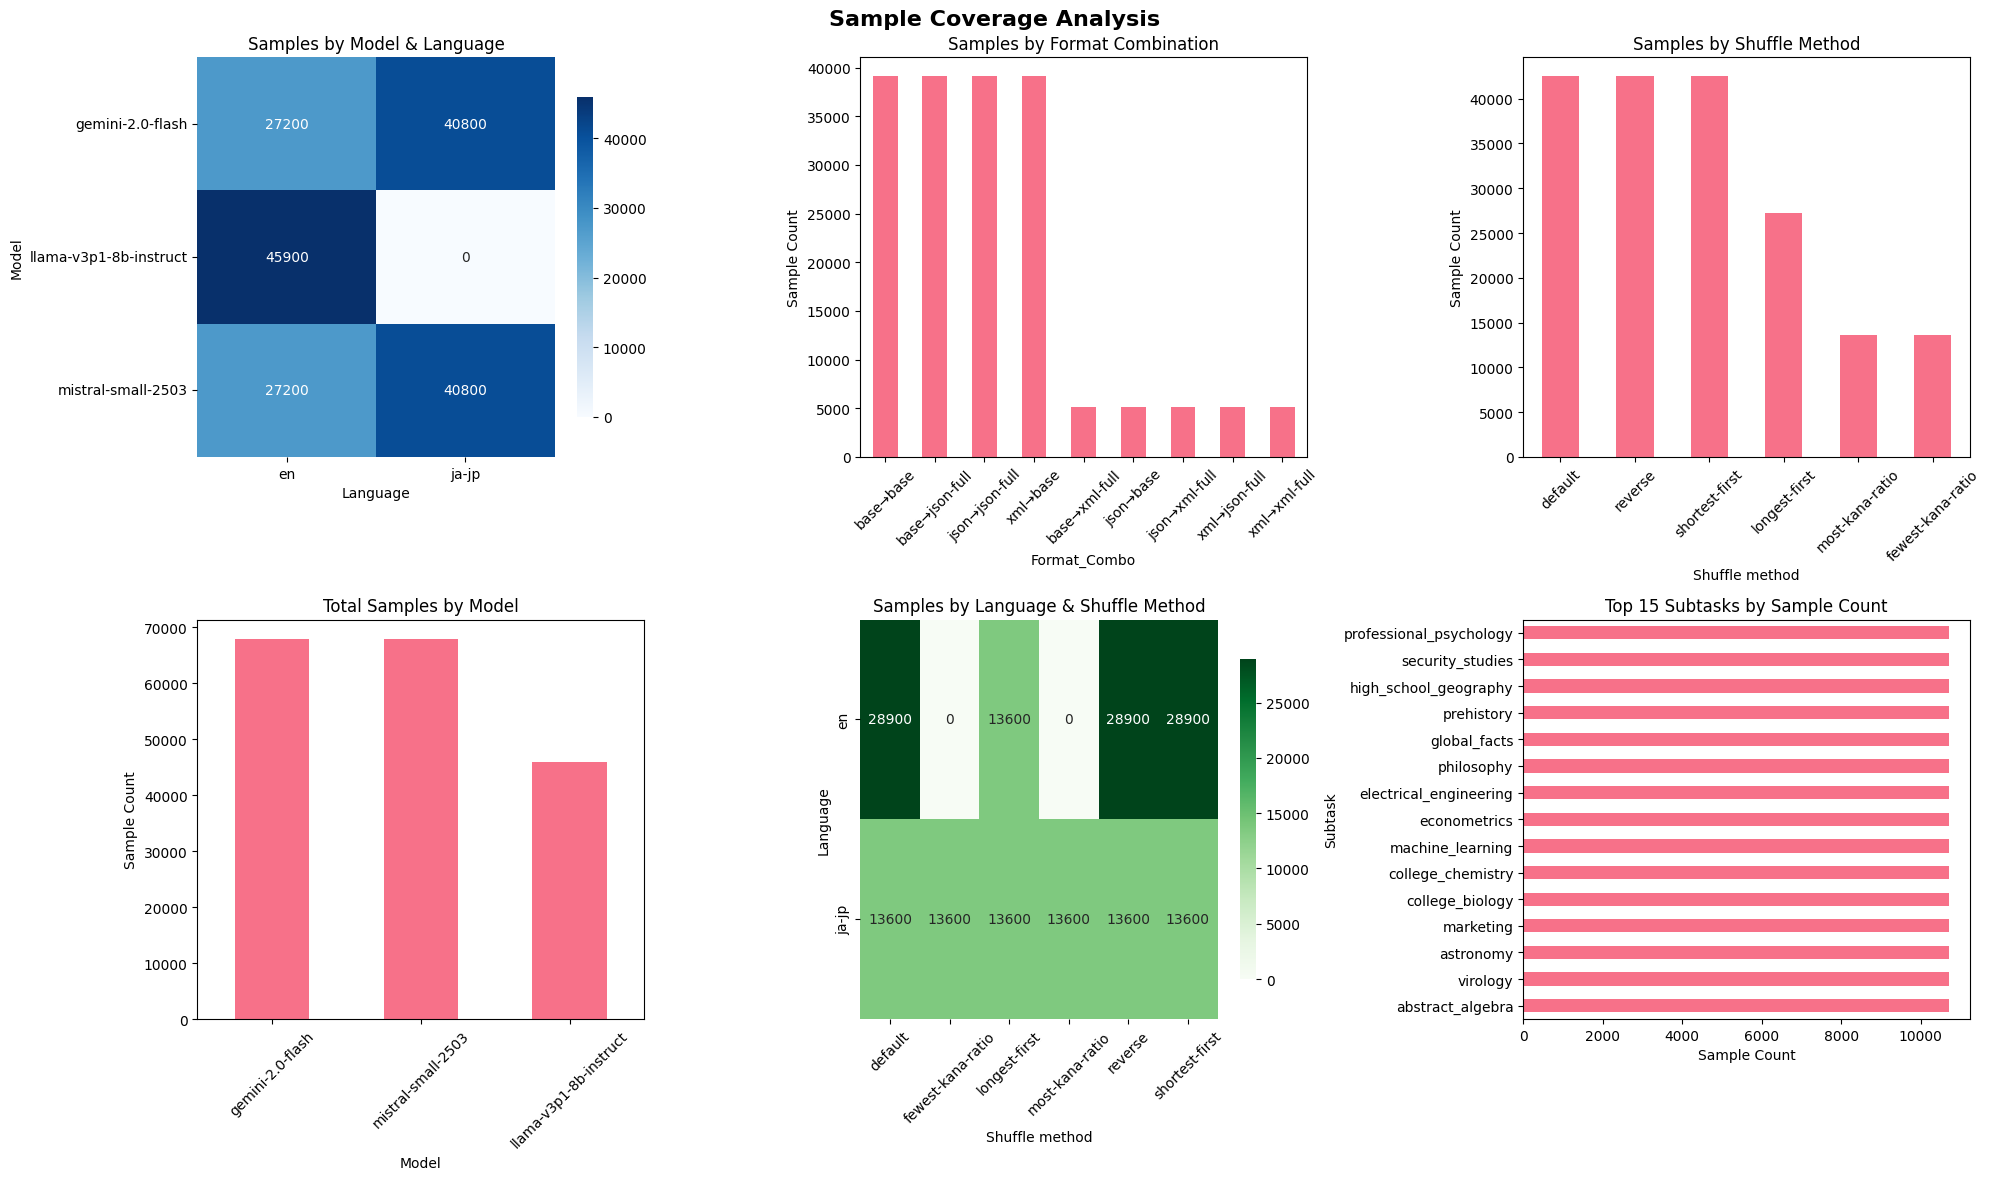


REPORT COMPLETE

🔎 QUICK CHECKS:
gemini-2.0-flash: 68,000 samples, languages: ['en' 'ja-jp']
mistral-small-2503: 68,000 samples, languages: ['en' 'ja-jp']
llama-v3p1-8b-instruct: 45,900 samples, languages: ['en']

💾 Detailed combination coverage saved to 'experiment_combinations_coverage.csv'


In [21]:
"""
Sample Coverage Checker for Order Effect Experiments

This script analyzes the sample coverage across all experimental combinations
in the three merged CSV files to identify data availability and gaps.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings('ignore')

class SampleCoverageChecker:
    def __init__(self, model_list):
        self.model_list = model_list
        self.data = {}
        self.combined_data = None
        
    def load_all_data(self):
        """Load data from all model CSV files"""
        print("Loading data from all models...")
        
        all_dfs = []
        for model in self.model_list:
            try:
                df = pd.read_csv(f'{model}_merged_results.csv', engine='c')
                df['Model'] = model  # Ensure model name is in the data
                self.data[model] = df
                all_dfs.append(df)
                print(f"✓ Loaded {len(df):,} samples from {model}")
            except FileNotFoundError:
                print(f"❌ File not found: {model}_merged_results.csv")
            except Exception as e:
                print(f"❌ Error loading {model}: {e}")
        
        if all_dfs:
            self.combined_data = pd.concat(all_dfs, ignore_index=True)
            print(f"\n📊 Total combined samples: {len(self.combined_data):,}")
        else:
            print("❌ No data loaded successfully")
    
    def get_experiment_dimensions(self):
        """Get all unique values for each experimental dimension"""
        if self.combined_data is None:
            print("No data loaded")
            return {}
        
        dimensions = {}
        key_columns = ['Model', 'Language', 'Input format', 'Output format', 'Shuffle method', 'Subtask']
        
        for col in key_columns:
            if col in self.combined_data.columns:
                unique_vals = sorted(self.combined_data[col].unique())
                dimensions[col] = unique_vals
                print(f"{col}: {len(unique_vals)} unique values")
                for val in unique_vals:
                    count = len(self.combined_data[self.combined_data[col] == val])
                    print(f"  {val}: {count:,} samples")
            else:
                print(f"❌ Column '{col}' not found")
        
        return dimensions
    
    def check_basic_combinations(self):
        """Check sample counts for basic experimental combinations"""
        if self.combined_data is None:
            return None
        
        print("\n" + "="*60)
        print("BASIC COMBINATION ANALYSIS")
        print("="*60)
        
        # 1. Model x Language
        print("\n📊 SAMPLES BY MODEL & LANGUAGE:")
        model_lang = self.combined_data.groupby(['Model', 'Language']).size().unstack(fill_value=0)
        print(model_lang)
        
        # 2. Model x Input Format x Output Format  
        print("\n📊 SAMPLES BY MODEL & FORMAT COMBINATION:")
        format_combo = self.combined_data.copy()
        format_combo['Format_Combo'] = format_combo['Input format'] + ' → ' + format_combo['Output format']
        model_format = format_combo.groupby(['Model', 'Format_Combo']).size().unstack(fill_value=0)
        print(model_format)
        
        # 3. Model x Shuffle Method
        print("\n📊 SAMPLES BY MODEL & SHUFFLE METHOD:")
        model_shuffle = self.combined_data.groupby(['Model', 'Shuffle method']).size().unstack(fill_value=0)
        print(model_shuffle)
        
        # 4. Language x Shuffle Method (across all models)
        print("\n📊 SAMPLES BY LANGUAGE & SHUFFLE METHOD:")
        lang_shuffle = self.combined_data.groupby(['Language', 'Shuffle method']).size().unstack(fill_value=0)
        print(lang_shuffle)
        
        return {
            'model_language': model_lang,
            'model_format': model_format, 
            'model_shuffle': model_shuffle,
            'language_shuffle': lang_shuffle
        }
    
    def check_detailed_combinations(self):
        """Check detailed experimental combinations"""
        if self.combined_data is None:
            return None
        
        print("\n" + "="*60)
        print("DETAILED COMBINATION ANALYSIS")
        print("="*60)
        
        # Full experimental combination
        full_combo = self.combined_data.groupby([
            'Model', 'Language', 'Input format', 'Output format', 'Shuffle method'
        ]).size().reset_index(name='Sample_Count')
        
        print(f"\n📈 FULL EXPERIMENTAL COMBINATIONS:")
        print(f"Total unique combinations found: {len(full_combo)}")
        print(f"Combinations with samples: {len(full_combo[full_combo['Sample_Count'] > 0])}")
        
        # Show top combinations by sample count
        print(f"\n🔝 TOP 10 COMBINATIONS BY SAMPLE COUNT:")
        top_combos = full_combo.nlargest(10, 'Sample_Count')
        for _, row in top_combos.iterrows():
            print(f"  {row['Model']} | {row['Language']} | {row['Input format']}→{row['Output format']} | {row['Shuffle method']}: {row['Sample_Count']:,} samples")
        
        # Show combinations with low sample counts
        print(f"\n⚠️  COMBINATIONS WITH LOW SAMPLE COUNTS (<100):")
        low_combos = full_combo[(full_combo['Sample_Count'] > 0) & (full_combo['Sample_Count'] < 100)]
        if len(low_combos) > 0:
            for _, row in low_combos.iterrows():
                print(f"  {row['Model']} | {row['Language']} | {row['Input format']}→{row['Output format']} | {row['Shuffle method']}: {row['Sample_Count']} samples")
        else:
            print("  None found - all combinations have ≥100 samples")
        
        return full_combo
    
    def find_missing_combinations(self):
        """Find missing experimental combinations"""
        if self.combined_data is None:
            return None
        
        print("\n" + "="*60)
        print("MISSING COMBINATION ANALYSIS")
        print("="*60)
        
        # Get all possible combinations
        models = self.combined_data['Model'].unique()
        languages = self.combined_data['Language'].unique()
        input_formats = self.combined_data['Input format'].unique()
        output_formats = self.combined_data['Output format'].unique()
        shuffle_methods = self.combined_data['Shuffle method'].unique()
        
        # Generate all theoretical combinations
        all_possible = list(product(models, languages, input_formats, output_formats, shuffle_methods))
        total_possible = len(all_possible)
        
        # Get existing combinations
        existing_combos = set()
        for _, row in self.combined_data.iterrows():
            combo = (row['Model'], row['Language'], row['Input format'], 
                    row['Output format'], row['Shuffle method'])
            existing_combos.add(combo)
        
        # Find missing combinations
        missing_combos = []
        for combo in all_possible:
            if combo not in existing_combos:
                missing_combos.append(combo)
        
        print(f"📊 COMBINATION COVERAGE SUMMARY:")
        print(f"  Total possible combinations: {total_possible:,}")
        print(f"  Existing combinations: {len(existing_combos):,}")
        print(f"  Missing combinations: {len(missing_combos):,}")
        print(f"  Coverage: {len(existing_combos)/total_possible*100:.1f}%")
        
        # Analyze missing patterns
        print(f"\n🔍 MISSING COMBINATION PATTERNS:")
        
        # Missing by model
        missing_by_model = {}
        for combo in missing_combos:
            model = combo[0]
            if model not in missing_by_model:
                missing_by_model[model] = 0
            missing_by_model[model] += 1
        
        print(f"  Missing by model:")
        for model, count in missing_by_model.items():
            print(f"    {model}: {count} missing combinations")
        
        # Missing by language
        missing_by_lang = {}
        for combo in missing_combos:
            lang = combo[1]
            if lang not in missing_by_lang:
                missing_by_lang[lang] = 0
            missing_by_lang[lang] += 1
        
        print(f"  Missing by language:")
        for lang, count in missing_by_lang.items():
            print(f"    {lang}: {count} missing combinations")
        
        # Show some example missing combinations
        print(f"\n📝 EXAMPLE MISSING COMBINATIONS (first 10):")
        for i, combo in enumerate(missing_combos[:10]):
            model, lang, inp_fmt, out_fmt, shuffle = combo
            print(f"  {i+1:2d}. {model} | {lang} | {inp_fmt}→{out_fmt} | {shuffle}")
        
        if len(missing_combos) > 10:
            print(f"    ... and {len(missing_combos)-10} more")
        
        return missing_combos
    
    def check_subtask_coverage(self):
        """Check sample coverage by subtask"""
        if self.combined_data is None:
            return None
        
        print("\n" + "="*60)
        print("SUBTASK COVERAGE ANALYSIS")
        print("="*60)
        
        # Samples by subtask and model
        subtask_model = self.combined_data.groupby(['Subtask', 'Model']).size().unstack(fill_value=0)
        
        print(f"\n📚 SUBTASK STATISTICS:")
        print(f"  Total subtasks: {len(self.combined_data['Subtask'].unique())}")
        
        # Subtasks by total samples
        subtask_totals = self.combined_data['Subtask'].value_counts()
        print(f"  Most sampled subtask: {subtask_totals.index[0]} ({subtask_totals.iloc[0]:,} samples)")
        print(f"  Least sampled subtask: {subtask_totals.index[-1]} ({subtask_totals.iloc[-1]:,} samples)")
        print(f"  Mean samples per subtask: {subtask_totals.mean():.1f}")
        
        # Show subtasks with low coverage
        low_coverage_subtasks = subtask_totals[subtask_totals < 50]
        if len(low_coverage_subtasks) > 0:
            print(f"\n⚠️  SUBTASKS WITH LOW COVERAGE (<50 samples):")
            for subtask, count in low_coverage_subtasks.items():
                print(f"    {subtask}: {count} samples")
        
        # Check which models have which subtasks
        print(f"\n📊 SUBTASK COVERAGE BY MODEL:")
        for model in self.combined_data['Model'].unique():
            model_data = self.combined_data[self.combined_data['Model'] == model]
            num_subtasks = len(model_data['Subtask'].unique())
            print(f"  {model}: {num_subtasks} subtasks")
        
        return subtask_model
    
    def create_visualizations(self):
        """Create visualizations of sample coverage"""
        if self.combined_data is None:
            return None
        
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('Sample Coverage Analysis', fontsize=16, fontweight='bold')
        
        # 1. Model x Language heatmap
        ax1 = axes[0, 0]
        model_lang = self.combined_data.groupby(['Model', 'Language']).size().unstack(fill_value=0)
        sns.heatmap(model_lang, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar_kws={'shrink': 0.8})
        ax1.set_title('Samples by Model & Language')
        ax1.set_ylabel('Model')
        
        # 2. Format combination distribution
        ax2 = axes[0, 1]
        format_combo = self.combined_data.copy()
        format_combo['Format_Combo'] = format_combo['Input format'] + '→' + format_combo['Output format']
        format_counts = format_combo['Format_Combo'].value_counts()
        format_counts.plot(kind='bar', ax=ax2, rot=45)
        ax2.set_title('Samples by Format Combination')
        ax2.set_ylabel('Sample Count')
        
        # 3. Shuffle method distribution
        ax3 = axes[0, 2]
        shuffle_counts = self.combined_data['Shuffle method'].value_counts()
        shuffle_counts.plot(kind='bar', ax=ax3, rot=45)
        ax3.set_title('Samples by Shuffle Method')
        ax3.set_ylabel('Sample Count')
        
        # 4. Model comparison
        ax4 = axes[1, 0]
        model_counts = self.combined_data['Model'].value_counts()
        model_counts.plot(kind='bar', ax=ax4, rot=45)
        ax4.set_title('Total Samples by Model')
        ax4.set_ylabel('Sample Count')
        
        # 5. Language x Shuffle heatmap
        ax5 = axes[1, 1]
        lang_shuffle = self.combined_data.groupby(['Language', 'Shuffle method']).size().unstack(fill_value=0)
        sns.heatmap(lang_shuffle, annot=True, fmt='d', cmap='Greens', ax=ax5, cbar_kws={'shrink': 0.8})
        ax5.set_title('Samples by Language & Shuffle Method')
        ax5.set_ylabel('Language')
        plt.setp(ax5.get_xticklabels(), rotation=45)
        
        # 6. Subtask distribution (top 15)
        ax6 = axes[1, 2]
        subtask_counts = self.combined_data['Subtask'].value_counts().head(15)
        subtask_counts.plot(kind='barh', ax=ax6)
        ax6.set_title('Top 15 Subtasks by Sample Count')
        ax6.set_xlabel('Sample Count')
        
        plt.tight_layout()
        return fig
    
    def generate_coverage_report(self):
        """Generate a comprehensive coverage report"""
        print("\n" + "="*80)
        print("COMPREHENSIVE SAMPLE COVERAGE REPORT")
        print("="*80)
        
        if self.combined_data is None:
            print("❌ No data available for analysis")
            return
        
        # Overall statistics
        total_samples = len(self.combined_data)
        unique_models = len(self.combined_data['Model'].unique())
        unique_languages = len(self.combined_data['Language'].unique())
        unique_subtasks = len(self.combined_data['Subtask'].unique())
        
        print(f"\n📈 OVERALL STATISTICS:")
        print(f"  Total samples: {total_samples:,}")
        print(f"  Unique models: {unique_models}")
        print(f"  Unique languages: {unique_languages}")
        print(f"  Unique subtasks: {unique_subtasks}")
        print(f"  Unique input formats: {len(self.combined_data['Input format'].unique())}")
        print(f"  Unique output formats: {len(self.combined_data['Output format'].unique())}")
        print(f"  Unique shuffle methods: {len(self.combined_data['Shuffle method'].unique())}")
        
        # Run all analyses
        basic_combos = self.check_basic_combinations()
        detailed_combos = self.check_detailed_combinations()
        missing_combos = self.find_missing_combinations()
        subtask_coverage = self.check_subtask_coverage()
        
        # Create visualizations
        print(f"\n📊 Generating visualizations...")
        try:
            fig = self.create_visualizations()
            print("✓ Visualizations created successfully")
            plt.show()
        except Exception as e:
            print(f"❌ Error creating visualizations: {e}")
        
        print(f"\n" + "="*80)
        print("REPORT COMPLETE")
        print("="*80)
        
        return {
            'basic_combinations': basic_combos,
            'detailed_combinations': detailed_combos,
            'missing_combinations': missing_combos,
            'subtask_coverage': subtask_coverage
        }

def run_coverage_analysis(model_list=None):
    """Run complete sample coverage analysis"""
    if model_list is None:
        model_list = ['gemini-2.0-flash', 'mistral-small-2503', 'llama-v3p1-8b-instruct']
    
    print("🔍 SAMPLE COVERAGE ANALYSIS")
    print("="*50)
    
    checker = SampleCoverageChecker(model_list)
    
    # Load data
    checker.load_all_data()
    
    if checker.combined_data is None:
        print("❌ No data loaded. Check file names and paths.")
        return None
    
    # Check dimensions
    print(f"\n📊 EXPERIMENTAL DIMENSIONS:")
    dimensions = checker.get_experiment_dimensions()
    
    # Generate full report
    results = checker.generate_coverage_report()
    
    return checker, results


# Run the analysis
checker, results = run_coverage_analysis()

# You can also check specific combinations
if checker is not None:
    print(f"\n🔎 QUICK CHECKS:")
    
    # Check specific model-language combinations
    for model in checker.data.keys():
        df = checker.data[model]
        languages = df['Language'].unique()
        print(f"{model}: {len(df):,} samples, languages: {languages}")
    
    # Export detailed results to CSV
    try:
        detailed_df = results['detailed_combinations']
        detailed_df.to_csv('experiment_combinations_coverage.csv', index=False)
        print(f"\n💾 Detailed combination coverage saved to 'experiment_combinations_coverage.csv'")
    except:
        print(f"\n❌ Could not save detailed results to CSV")

In [22]:
import pandas as pd
import numpy as np
import ast

class OrderEffectAnalyzer:
    def __init__(self, model_list):
        self.model_list = model_list
        self.data = {}
        self.metrics = {}
        
    def load_data(self):
        for model in self.model_list:
            df = pd.read_csv(f'{model}_merged_results.csv', engine='c')
            
            df['Original to shuffled'] = df['Original to shuffled'].apply(self._shuffle_map_conversion)
            df['Shuffled to Original'] = df['Original to shuffled'].apply(
                lambda x: {val: key for key, val in x.items()}
            )
            
            df['Response answer id in default'] = df.apply(self._map_answer, axis=1)
            df['Response answer id in default'] = df['Response answer id in default'].fillna("Others")
            df['Is correct response'] = df['Response answer'] == df['Shuffled correct answer']
            
            if 'llama' in model:
                df['logprobs'] = df['logprobs'].apply(self._process_logprobs)
                df['confidence'] = df['logprobs'].apply(self._extract_confidence)
                df['entropy'] = df['logprobs'].apply(self._compute_entropy)
            
            self.data[model] = df
    
    def _shuffle_map_conversion(self, shuffle_map):
        if isinstance(shuffle_map, str):
            return ast.literal_eval(shuffle_map)
        return shuffle_map
    
    def _map_answer(self, row):
        response_answer = row['Response answer']
        shuffled_to_original = row['Shuffled to Original']
        if response_answer in shuffled_to_original:
            return shuffled_to_original[response_answer]
        return response_answer
    
    def _process_logprobs(self, logprobs):
        if pd.isna(logprobs) or logprobs == "":
            return {'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0}
        if isinstance(logprobs, str):
            return ast.literal_eval(logprobs)
        return logprobs
    
    def _extract_confidence(self, logprobs):
        if not logprobs or all(v == 0 for v in logprobs.values()):
            return 0.0
        probs = [float(v) for v in logprobs.values()]
        return max(probs)
    
    def _compute_entropy(self, logprobs):
        if not logprobs or all(v == 0 for v in logprobs.values()):
            return np.log(4)
        probs = [float(v) for v in logprobs.values()]
        probs = np.array(probs)
        probs = probs / probs.sum() if probs.sum() > 0 else probs
        probs = np.clip(probs, 1e-10, 1.0)
        return -np.sum(probs * np.log(probs))
    
    def compute_accuracy_dict(self, df):
        target_key = 'Is correct response'
        results = {}
        
        results['Language'] = df.groupby(['Language', 'Shuffle method'])[target_key].mean()
        results['Subtask'] = df.groupby(['Subtask', 'Shuffle method'])[target_key].mean()
        
        format_cols = ['Language', 'Input format', 'Output format', 'Shuffle method']
        results['Language_format'] = df.groupby(format_cols)[target_key].mean()
        
        subtask_format_cols = ['Subtask', 'Input format', 'Output format', 'Shuffle method'] 
        results['Subtask_format'] = df.groupby(subtask_format_cols)[target_key].mean()
        
        all_cols = ['Language', 'Subtask', 'Input format', 'Output format', 'Shuffle method']
        results['All'] = df.groupby(all_cols)[target_key].mean()
        
        return results
    
    def compute_option_accuracy_dict(self, df):
        target_key = 'Is correct response'
        results = {}
        
        lang_cols = ['Language', 'Shuffle method', 'Original correct answer']
        results['Language'] = df.groupby(lang_cols)[target_key].mean()
        
        subtask_cols = ['Subtask', 'Shuffle method', 'Original correct answer']
        results['Subtask'] = df.groupby(subtask_cols)[target_key].mean()
        
        lang_format_cols = ['Language', 'Input format', 'Output format', 'Shuffle method', 'Original correct answer']
        results['Language_format'] = df.groupby(lang_format_cols)[target_key].mean()
        
        subtask_format_cols = ['Subtask', 'Input format', 'Output format', 'Shuffle method', 'Original correct answer']
        results['Subtask_format'] = df.groupby(subtask_format_cols)[target_key].mean()
        
        all_cols = ['Language', 'Subtask', 'Input format', 'Output format', 'Shuffle method', 'Original correct answer']
        results['All'] = df.groupby(all_cols)[target_key].mean()
        
        return results
    
    def compute_rstd_rsd(self, option_acc_dict, acc_dict, level_name):
        option_acc = option_acc_dict[level_name]
        acc = acc_dict[level_name]
        
        group_levels = [level for level in option_acc.index.names if level != 'Original correct answer']
        
        rstd = option_acc.groupby(group_levels).std(ddof=0)
        rsd = rstd / acc
        
        return rstd, rsd
    
    def compute_metrics_by_group(self, df, group_cols, option_level=False):
        if option_level:
            group_cols_with_option = group_cols + ['Original correct answer']
            accuracy_by_option = df.groupby(group_cols_with_option)['Is correct response'].mean()
            
            results = {}
            for group in df.groupby(group_cols).groups.keys():
                if isinstance(group, tuple):
                    group_filter = dict(zip(group_cols, group))
                else:
                    group_filter = {group_cols[0]: group}
                
                group_data = accuracy_by_option
                for col, val in group_filter.items():
                    if col in group_data.index.names:
                        group_data = group_data.xs(val, level=col)
                
                if len(group_data) > 1:
                    rstd = group_data.std()
                    mean_acc = group_data.mean()
                    rsd = rstd / mean_acc if mean_acc > 0 else np.nan
                    results[group] = {'RStd': rstd, 'RSD': rsd, 'Mean_Acc': mean_acc}
                else:
                    results[group] = {'RStd': np.nan, 'RSD': np.nan, 'Mean_Acc': np.nan}
            
            return pd.DataFrame(results).T
        else:
            return df.groupby(group_cols)['Is correct response'].mean()
    
    def compute_fluctuation_rate(self, df, forward_method, backward_method, group_cols):
        forward_df = df[df['Shuffle method'] == forward_method].copy()
        backward_df = df[df['Shuffle method'] == backward_method].copy()
        
        merge_cols = ['Subtask', 'Question id in subtask', 'Language', 'Input format', 'Output format']
        available_merge_cols = [col for col in merge_cols if col in forward_df.columns]
        
        merged = forward_df.merge(backward_df, on=available_merge_cols, suffixes=('_forward', '_backward'))
        
        merged['answers_differ'] = (
            merged['Response answer id in default_forward'] != 
            merged['Response answer id in default_backward']
        )
        
        if group_cols:
            return merged.groupby(group_cols)['answers_differ'].mean()
        else:
            return merged['answers_differ'].mean()
    
    def analyze_language_sensitivity(self):
        results = {}
        
        for model in self.data.keys():
            df = self.data[model]
            
            acc_dict = self.compute_accuracy_dict(df)
            option_acc_dict = self.compute_option_accuracy_dict(df)
            
            rstd, rsd = self.compute_rstd_rsd(option_acc_dict, acc_dict, 'Language_format')
            
            fr_results = {}
            for forward, backward in [('default', 'reverse'), ('longest-first', 'shortest-first')]:
                fr = self.compute_fluctuation_rate(df, forward, backward, ['Language', 'Input format', 'Output format'])
                fr_results[f'FR_{forward}_{backward}'] = fr
            
            results[model] = {
                'rstd': rstd,
                'rsd': rsd, 
                'accuracy': acc_dict.get('Language_format', pd.Series()),
                'fluctuation_rates': fr_results
            }
        
        self.metrics['language_sensitivity'] = results
        return results
    
    def analyze_subtask_sensitivity(self):
        results = {}
        
        for model in self.data.keys():
            df = self.data[model]
            
            acc_dict = self.compute_accuracy_dict(df)
            option_acc_dict = self.compute_option_accuracy_dict(df)
            
            rstd, rsd = self.compute_rstd_rsd(option_acc_dict, acc_dict, 'Subtask')
            
            fr_results = {}
            for forward, backward in [('default', 'reverse'), ('longest-first', 'shortest-first')]:
                fr = self.compute_fluctuation_rate(df, forward, backward, ['Subtask'])
                fr_results[f'FR_{forward}_{backward}'] = fr
            
            results[model] = {
                'rstd': rstd,
                'rsd': rsd,
                'accuracy': acc_dict.get('Subtask', pd.Series()),
                'fluctuation_rates': fr_results
            }
        
        self.metrics['subtask_sensitivity'] = results
        return results
    
    def analyze_format_effects(self):
        results = {}
        
        for model in self.data.keys():
            df = self.data[model]
            
            acc_dict = self.compute_accuracy_dict(df)
            option_acc_dict = self.compute_option_accuracy_dict(df)
            
            rstd, rsd = self.compute_rstd_rsd(option_acc_dict, acc_dict, 'Language_format')
            
            fr_results = {}
            for forward, backward in [('default', 'reverse')]:
                fr = self.compute_fluctuation_rate(df, forward, backward, ['Input format', 'Output format'])
                fr_results[f'FR_{forward}_{backward}'] = fr
            
            results[model] = {
                'rstd': rstd,
                'rsd': rsd,
                'accuracy': acc_dict.get('Language_format', pd.Series()),
                'fluctuation_rates': fr_results
            }
        
        self.metrics['format_effects'] = results
        return results
    
    def analyze_confidence_bias_relationship(self):
        results = {}
        
        for model in self.data.keys():
            if 'llama' not in model:
                continue
                
            df = self.data[model]
            
            df['confidence_bin'] = pd.cut(df['confidence'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
            
            group_cols = ['confidence_bin', 'Shuffle method']
            metrics = self.compute_metrics_by_group(df, group_cols, option_level=True)
            
            stability_by_question = []
            question_groups = df.groupby(['Subtask', 'Question id in subtask', 'Input format', 'Output format'])
            
            for name, group in question_groups:
                if len(group) > 1:
                    conf_std = group['confidence'].std()
                    acc_std = group['Is correct response'].std()
                    mean_conf = group['confidence'].mean()
                    stability_by_question.append({
                        'mean_confidence': mean_conf,
                        'confidence_std': conf_std,
                        'accuracy_std': acc_std,
                        'num_shuffles': len(group)
                    })
            
            confidence_analysis = pd.DataFrame(stability_by_question)
            
            results[model] = {
                'metrics_by_confidence': metrics,
                'confidence_analysis': confidence_analysis
            }
        
        self.metrics['confidence_bias'] = results
        return results
    
    def create_summary_table(self):
        summary_data = []
        
        for model in self.data.keys():
            df = self.data[model]
            languages = df['Language'].unique()
            
            for lang in languages:
                lang_df = df[df['Language'] == lang]
                
                option_acc_dict = self.compute_option_accuracy_dict(lang_df)
                acc_dict = self.compute_accuracy_dict(lang_df)
                
                mean_rsd = np.nan
                for level in ['Language_format', 'Subtask', 'All']:
                    if level in option_acc_dict and level in acc_dict:
                        rstd, rsd = self.compute_rstd_rsd(option_acc_dict, acc_dict, level)
                        if not rsd.empty:
                            mean_rsd = rsd.mean()
                            break
                
                mean_accuracy = lang_df['Is correct response'].mean()
                
                fr = self.compute_fluctuation_rate(lang_df, 'default', 'reverse', [])
                fr_value = fr if isinstance(fr, (int, float)) else np.nan
                
                summary_data.append({
                    'Model': model,
                    'Language': lang,
                    'Num_Subtasks': len(lang_df['Subtask'].unique()),
                    'Num_Samples': len(lang_df),
                    'Mean_Accuracy': mean_accuracy,
                    'Mean_RSD': mean_rsd,
                    'Fluctuation_Rate': fr_value
                })
        
        return pd.DataFrame(summary_data)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

class OrderEffectVisualizer:
    def __init__(self, analyzer, summary_table):
        self.analyzer = analyzer
        self.summary_table = summary_table
        self.metrics = analyzer.metrics
        
        plt.style.use('default')
        sns.set_palette("husl")
        
        self.output_dir = "./output"
        os.makedirs(self.output_dir, exist_ok=True)
        
    def save_figure(self, fig, name):
        main_path = os.path.join(self.output_dir, f"{name}.svg")
        fig.savefig(main_path, format='svg', bbox_inches='tight', dpi=300)
        
    def save_individual_subplots(self, fig, base_name):
        """Save each subplot as an individual figure with improved heatmap handling"""
        for i, ax in enumerate(fig.axes):
            if ax.get_visible():
                # Create new figure with appropriate size
                subplot_fig, subplot_ax = plt.subplots(1, 1, figsize=(12, 10))
                
                # Copy basic properties
                subplot_ax.set_title(ax.get_title(), fontsize=14, fontweight='bold')
                subplot_ax.set_xlabel(ax.get_xlabel(), fontsize=12)
                subplot_ax.set_ylabel(ax.get_ylabel(), fontsize=12)
                
                try:
                    plot_copied = False
                    
                    # 1. Priority: Handle seaborn heatmaps first by detecting text annotations
                    texts = ax.texts
                    if texts and len(texts) >= 2:  # Seaborn heatmaps have text annotations
                        try:
                            # Extract positions and values from text annotations
                            text_data = []
                            for text in texts:
                                try:
                                    x, y = text.get_position()
                                    text_val = text.get_text().strip()
                                    # Try to parse as float
                                    val = float(text_val)
                                    text_data.append((x, y, val, text_val))
                                except (ValueError, AttributeError):
                                    continue
                            
                            if len(text_data) >= 2:
                                # Extract unique coordinates
                                x_coords = sorted(list(set([item[0] for item in text_data])))
                                y_coords = sorted(list(set([item[1] for item in text_data])), reverse=True)  # Reverse for proper orientation
                                
                                n_rows = len(y_coords)
                                n_cols = len(x_coords)
                                
                                # Create data matrix
                                data_matrix = np.full((n_rows, n_cols), np.nan)
                                text_matrix = [['' for _ in range(n_cols)] for _ in range(n_rows)]
                                
                                for x, y, val, text_val in text_data:
                                    try:
                                        row_idx = y_coords.index(y)
                                        col_idx = x_coords.index(x)
                                        data_matrix[row_idx, col_idx] = val
                                        text_matrix[row_idx][col_idx] = text_val
                                    except (ValueError, IndexError):
                                        continue
                                
                                # Get colormap from collections
                                cmap = 'viridis'  # Default
                                vmin, vmax = None, None
                                if ax.collections:
                                    try:
                                        cmap = ax.collections[0].get_cmap()
                                        vmin, vmax = ax.collections[0].get_clim()
                                    except:
                                        pass
                                
                                # Set vmin/vmax from data if not available
                                if vmin is None or vmax is None:
                                    valid_data = data_matrix[~np.isnan(data_matrix)]
                                    if len(valid_data) > 0:
                                        vmin = np.min(valid_data)
                                        vmax = np.max(valid_data)
                                
                                # Create the heatmap
                                im = subplot_ax.imshow(data_matrix, 
                                                     aspect='auto',
                                                     cmap=cmap,
                                                     vmin=vmin,
                                                     vmax=vmax,
                                                     interpolation='nearest')  # Sharp edges for discrete cells
                                
                                # Add text annotations with better spacing
                                font_size, show_text = self._fix_heatmap_text_overlap(subplot_ax, data_matrix, text_matrix, n_rows, n_cols)
                                
                                if show_text:
                                    for i in range(n_rows):
                                        for j in range(n_cols):
                                            if text_matrix[i][j]:
                                                # Calculate text color based on background
                                                if not np.isnan(data_matrix[i, j]) and vmin is not None and vmax is not None:
                                                    normalized_val = (data_matrix[i, j] - vmin) / (vmax - vmin) if vmax != vmin else 0.5
                                                    text_color = 'white' if normalized_val < 0.5 else 'black'
                                                else:
                                                    text_color = 'black'
                                                
                                                # Truncate long text for small cells
                                                display_text = text_matrix[i][j]
                                                if font_size < 8 and len(display_text) > 5:
                                                    try:
                                                        # For numbers, use fewer decimal places
                                                        val = float(display_text)
                                                        if abs(val) < 0.001:
                                                            display_text = f"{val:.1e}"
                                                        elif abs(val) < 0.01:
                                                            display_text = f"{val:.3f}"
                                                        elif abs(val) < 1:
                                                            display_text = f"{val:.2f}"
                                                        else:
                                                            display_text = f"{val:.1f}"
                                                    except ValueError:
                                                        # For non-numeric text, truncate
                                                        display_text = display_text[:4] + "..." if len(display_text) > 4 else display_text
                                                
                                                subplot_ax.text(j, i, display_text,
                                                              ha='center', va='center', 
                                                              fontweight='bold',
                                                              fontsize=font_size,
                                                              color=text_color)
                                
                                # Add colorbar
                                cbar = plt.colorbar(im, ax=subplot_ax, shrink=0.8)
                                
                                # Set tick labels
                                x_labels = [t.get_text() for t in ax.get_xticklabels() if t.get_text().strip()]
                                y_labels = [t.get_text() for t in ax.get_yticklabels() if t.get_text().strip()]
                                
                                # Set ticks at cell centers
                                subplot_ax.set_xticks(range(n_cols))
                                subplot_ax.set_yticks(range(n_rows))
                                
                                if x_labels and len(x_labels) >= n_cols:
                                    subplot_ax.set_xticklabels(x_labels[:n_cols], rotation=45, ha='right')
                                elif len(x_labels) > 0:
                                    # Pad or repeat labels if needed
                                    padded_x_labels = (x_labels * ((n_cols // len(x_labels)) + 1))[:n_cols]
                                    subplot_ax.set_xticklabels(padded_x_labels, rotation=45, ha='right')
                                
                                if y_labels and len(y_labels) >= n_rows:
                                    subplot_ax.set_yticklabels(y_labels[:n_rows])
                                elif len(y_labels) > 0:
                                    # Pad or repeat labels if needed
                                    padded_y_labels = (y_labels * ((n_rows // len(y_labels)) + 1))[:n_rows]
                                    subplot_ax.set_yticklabels(padded_y_labels)
                                
                                # Add grid for clarity
                                subplot_ax.set_xlim(-0.5, n_cols - 0.5)
                                subplot_ax.set_ylim(-0.5, n_rows - 0.5)
                                
                                plot_copied = True
                                
                        except Exception as seaborn_error:
                            print(f"Seaborn heatmap extraction failed for subplot {i+1}: {seaborn_error}")
                    
                    # 2. Fallback: Handle matplotlib heatmaps via collections
                    if not plot_copied:
                        for collection in ax.collections:
                            if hasattr(collection, 'get_array') and collection.get_array() is not None:
                                try:
                                    # First, determine the logical grid size from tick labels
                                    x_labels = [t.get_text() for t in ax.get_xticklabels() if t.get_text().strip()]
                                    y_labels = [t.get_text() for t in ax.get_yticklabels() if t.get_text().strip()]
                                    
                                    # Use tick labels to determine logical dimensions
                                    if x_labels and y_labels:
                                        n_cols = len(x_labels)
                                        n_rows = len(y_labels)
                                        
                                        # For matplotlib/seaborn heatmaps, we need to reconstruct the logical data
                                        # from the interpolated internal array
                                        array_data = collection.get_array()
                                        
                                        # Get original data bounds
                                        vmin, vmax = collection.get_clim()
                                        cmap = collection.get_cmap()
                                        
                                        # Try to extract logical values by sampling the array at regular intervals
                                        if len(array_data) > n_rows * n_cols:
                                            # Array is interpolated/oversampled, need to downsample
                                            array_len = len(array_data)
                                            array_side = int(np.sqrt(array_len))
                                            
                                            if array_side * array_side == array_len:
                                                # Perfect square array, downsample to logical grid
                                                full_array = array_data.reshape(array_side, array_side)
                                                
                                                # Sample at regular intervals to get logical values
                                                row_indices = np.round(np.linspace(0, array_side-1, n_rows)).astype(int)
                                                col_indices = np.round(np.linspace(0, array_side-1, n_cols)).astype(int)
                                                
                                                logical_data = full_array[np.ix_(row_indices, col_indices)]
                                            else:
                                                # Non-square array, try to sample linearly
                                                indices = np.round(np.linspace(0, len(array_data)-1, n_rows * n_cols)).astype(int)
                                                sampled_data = array_data[indices]
                                                logical_data = sampled_data.reshape(n_rows, n_cols)
                                        else:
                                            # Array size matches or is smaller, use as-is
                                            required_size = n_rows * n_cols
                                            if len(array_data) < required_size:
                                                # Pad with NaN
                                                padded_data = np.full(required_size, np.nan)
                                                padded_data[:len(array_data)] = array_data
                                                logical_data = padded_data.reshape(n_rows, n_cols)
                                            else:
                                                logical_data = array_data[:required_size].reshape(n_rows, n_cols)
                                        
                                        # Create the heatmap with logical dimensions
                                        im = subplot_ax.imshow(logical_data, 
                                                             aspect='auto',
                                                             cmap=cmap,
                                                             vmin=vmin,
                                                             vmax=vmax,
                                                             interpolation='nearest')
                                        
                                        plt.colorbar(im, ax=subplot_ax, shrink=0.8)
                                        
                                        # Set ticks at logical positions
                                        subplot_ax.set_xticks(range(n_cols))
                                        subplot_ax.set_yticks(range(n_rows))
                                        subplot_ax.set_xticklabels(x_labels, rotation=45, ha='right')
                                        subplot_ax.set_yticklabels(y_labels)
                                        
                                        # Set proper limits
                                        subplot_ax.set_xlim(-0.5, n_cols - 0.5)
                                        subplot_ax.set_ylim(-0.5, n_rows - 0.5)
                                        
                                        plot_copied = True
                                        break
                                    
                                    else:
                                        # No tick labels available, use coordinate-based approach
                                        array_data = collection.get_array()
                                        
                                        if hasattr(collection, '_coordinates') and collection._coordinates is not None:
                                            coords = collection._coordinates
                                            n_rows = coords.shape[0] - 1
                                            n_cols = coords.shape[1] - 1
                                        else:
                                            # Default to square-ish dimensions
                                            data_len = len(array_data)
                                            n_rows = int(np.sqrt(data_len))
                                            n_cols = int(np.ceil(data_len / n_rows))
                                        
                                        # Use original approach for coordinate-based heatmaps
                                        required_size = n_rows * n_cols
                                        if len(array_data) != required_size:
                                            if len(array_data) < required_size:
                                                padded_data = np.full(required_size, np.nan)
                                                padded_data[:len(array_data)] = array_data
                                                array_data = padded_data
                                            else:
                                                array_data = array_data[:required_size]
                                        
                                        reshaped_data = array_data.reshape(n_rows, n_cols)
                                        
                                        cmap = collection.get_cmap()
                                        vmin, vmax = collection.get_clim()
                                        
                                        im = subplot_ax.imshow(reshaped_data, 
                                                             aspect='auto',
                                                             cmap=cmap,
                                                             vmin=vmin,
                                                             vmax=vmax,
                                                             interpolation='nearest')
                                        
                                        plt.colorbar(im, ax=subplot_ax, shrink=0.8)
                                        
                                        subplot_ax.set_xticks(range(n_cols))
                                        subplot_ax.set_yticks(range(n_rows))
                                        
                                        plot_copied = True
                                        break
                                    
                                except Exception as collection_error:
                                    print(f"Collection heatmap extraction failed for subplot {i+1}: {collection_error}")
                                    continue
                    
                    # 3. Handle other plot types (box plots, bar plots, etc.)
                    if not plot_copied and ax.patches:
                        # Copy axis limits and ticks first
                        subplot_ax.set_xlim(ax.get_xlim())
                        subplot_ax.set_ylim(ax.get_ylim())
                        
                        # Copy patches (rectangles, boxes, etc.)
                        for patch in ax.patches:
                            try:
                                if hasattr(patch, 'get_x') and hasattr(patch, 'get_y'):
                                    from matplotlib.patches import Rectangle
                                    new_patch = Rectangle(
                                        (patch.get_x(), patch.get_y()),
                                        patch.get_width(), patch.get_height(),
                                        facecolor=patch.get_facecolor(),
                                        edgecolor=patch.get_edgecolor(),
                                        alpha=patch.get_alpha(),
                                        linewidth=patch.get_linewidth()
                                    )
                                    subplot_ax.add_patch(new_patch)
                                else:
                                    # Handle other patch types
                                    import matplotlib.patches as mpatches
                                    path = patch.get_path()
                                    new_patch = mpatches.PathPatch(
                                        path,
                                        facecolor=patch.get_facecolor(),
                                        edgecolor=patch.get_edgecolor(),
                                        alpha=patch.get_alpha(),
                                        linewidth=patch.get_linewidth()
                                    )
                                    subplot_ax.add_patch(new_patch)
                            except Exception as patch_error:
                                print(f"Patch copying failed: {patch_error}")
                                continue
                        
                        # Copy lines (whiskers, medians, etc.)
                        for line in ax.get_lines():
                            x_data, y_data = line.get_data()
                            subplot_ax.plot(x_data, y_data, 
                                          color=line.get_color(),
                                          linewidth=line.get_linewidth(),
                                          linestyle=line.get_linestyle(),
                                          marker=line.get_marker(),
                                          markersize=line.get_markersize(),
                                          alpha=line.get_alpha())
                        
                        # Set tick labels
                        self._copy_tick_labels(ax, subplot_ax)
                        plot_copied = True
                    
                    # 4. Handle scatter plots and line plots
                    if not plot_copied:
                        # Copy collections (scatter plots)
                        for collection in ax.collections:
                            if hasattr(collection, 'get_offsets'):
                                offsets = collection.get_offsets()
                                if len(offsets) > 0:
                                    try:
                                        colors = collection.get_facecolors()
                                        if len(colors) == 1:
                                            colors = colors[0]
                                    except:
                                        colors = 'blue'
                                    
                                    try:
                                        sizes = collection.get_sizes()
                                        if len(sizes) == 1:
                                            sizes = sizes[0]
                                    except:
                                        sizes = 20
                                    
                                    subplot_ax.scatter(offsets[:, 0], offsets[:, 1], 
                                                     c=colors, s=sizes,
                                                     alpha=collection.get_alpha())
                                    plot_copied = True
                        
                        # Copy lines
                        for line in ax.get_lines():
                            x_data, y_data = line.get_data()
                            subplot_ax.plot(x_data, y_data,
                                          color=line.get_color(),
                                          linewidth=line.get_linewidth(),
                                          linestyle=line.get_linestyle(),
                                          marker=line.get_marker(),
                                          markersize=line.get_markersize(),
                                          alpha=line.get_alpha(),
                                          label=line.get_label())
                            plot_copied = True
                        
                        if plot_copied:
                            subplot_ax.set_xlim(ax.get_xlim())
                            subplot_ax.set_ylim(ax.get_ylim())
                            self._copy_tick_labels(ax, subplot_ax)
                    
                    # 5. Handle legend
                    legend = ax.get_legend()
                    if legend and plot_copied:
                        labels = [t.get_text() for t in legend.get_texts()]
                        if labels and any(label.strip() for label in labels):
                            try:
                                subplot_ax.legend(labels, loc='best', fontsize=10)
                            except:
                                pass
                    
                    # 6. If nothing was copied, create a placeholder
                    if not plot_copied:
                        subplot_ax.text(0.5, 0.5, 
                                      f'Subplot {i+1}: {ax.get_title()}\n(Original plot preserved in main figure)',
                                      ha='center', va='center', 
                                      transform=subplot_ax.transAxes,
                                      fontsize=12, 
                                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
                        subplot_ax.set_xlim(0, 1)
                        subplot_ax.set_ylim(0, 1)
                        subplot_ax.set_xticks([])
                        subplot_ax.set_yticks([])
                
                except Exception as e:
                    print(f"Error processing subplot {i+1}: {e}")
                    # Fallback for any errors
                    subplot_ax.text(0.5, 0.5, 
                                  f'Subplot {i+1}: {ax.get_title()}\n(Extraction failed: {str(e)[:50]}...)',
                                  ha='center', va='center', 
                                  transform=subplot_ax.transAxes,
                                  fontsize=10,
                                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
                
                # Save the subplot
                subplot_path = os.path.join(self.output_dir, f"{base_name}_subplot_{i+1}.svg")
                subplot_fig.savefig(subplot_path, format='svg', bbox_inches='tight', dpi=300)
                plt.close(subplot_fig)
    
    def _fix_heatmap_text_overlap(self, subplot_ax, data_matrix, text_matrix, n_rows, n_cols):
        """Fix overlapping text in heatmaps by adjusting font size and spacing"""
        
        # Calculate appropriate font size based on cell size
        fig_width, fig_height = subplot_ax.figure.get_size_inches()
        cell_width = fig_width / n_cols
        cell_height = fig_height / n_rows
        
        # Base font size calculation
        base_font_size = min(cell_width * 72 / 4, cell_height * 72 / 4)  # 72 points per inch, divide by 4 for padding
        font_size = max(6, min(12, base_font_size))  # Clamp between 6 and 12
        
        # If we have many cells, reduce font size further
        if n_rows * n_cols > 20:
            font_size = max(4, font_size * 0.7)
        elif n_rows * n_cols > 50:
            font_size = max(3, font_size * 0.5)
        
        # Determine if we should show text at all
        show_text = True
        if n_rows * n_cols > 100:  # Too many cells
            show_text = False
        
        return font_size, show_text
    
    def _copy_tick_labels(self, source_ax, target_ax):
        """Helper method to copy tick labels from source to target axis"""
        try:
            # X-axis ticks
            if source_ax.get_xticklabels():
                x_labels = [t.get_text() for t in source_ax.get_xticklabels()]
                if any(x_labels):
                    target_ax.set_xticks(source_ax.get_xticks())
                    rotation = 0
                    if source_ax.get_xticklabels():
                        rotation = source_ax.get_xticklabels()[0].get_rotation()
                    target_ax.set_xticklabels(x_labels, rotation=rotation)
            
            # Y-axis ticks
            if source_ax.get_yticklabels():
                y_labels = [t.get_text() for t in source_ax.get_yticklabels()]
                if any(y_labels):
                    target_ax.set_yticks(source_ax.get_yticks())
                    target_ax.set_yticklabels(y_labels)
        except Exception as e:
            print(f"Tick label copying failed: {e}")
    
    def plot_accuracy_by_io_format(self):
        """Create accuracy plots by input/output format combinations"""
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle('Accuracy by Input/Output Format Combinations', fontsize=16, fontweight='bold')
        
        # Define model groups and their expected format combinations
        gemini_mistral_models = ['gemini-2.0-flash', 'mistral-small-2503']
        llama_models = ['llama-v3p1-8b-instruct']
        
        # Expected format combinations for each group
        gemini_mistral_formats = [
            'base_base', 'base_json-full', 'json_json-full', 'xml_base'
        ]
        llama_formats = [
            'base_base', 'base_json-full', 'base_xml-full',
            'json_base', 'json_json-full', 'json_xml-full',
            'xml_base', 'xml_json-full', 'xml_xml-full'
        ]
        
        # Plot 1: Gemini and Mistral models
        ax1 = axes[0]
        self._plot_format_accuracy_for_group(ax1, gemini_mistral_models, gemini_mistral_formats, 
                                           'Gemini & Mistral Models')
        
        # Plot 2: Llama models
        ax2 = axes[1]
        self._plot_format_accuracy_for_group(ax2, llama_models, llama_formats, 
                                           'Llama Models')
        
        plt.tight_layout()
        self.save_figure(fig, 'accuracy_by_io_format')
        self.save_individual_subplots(fig, 'accuracy_by_io_format')
        return fig
    
    def _plot_format_accuracy_for_group(self, ax, models, expected_formats, title):
        """Helper method to plot accuracy by format for a group of models"""
        format_data = []
        
        for model in models:
            if model not in self.analyzer.data:
                continue
                
            df = self.analyzer.data[model]
            
            # Create format combination column
            df_copy = df.copy()
            df_copy['Format_Combo'] = (df_copy['Input format'].astype(str) + 
                                     '_' + df_copy['Output format'].astype(str))
            
            # Calculate accuracy for each format combination
            format_accuracy = df_copy.groupby('Format_Combo')['Is correct response'].agg(['mean', 'count']).reset_index()
            format_accuracy.columns = ['Format_Combo', 'Accuracy', 'Count']
            format_accuracy['Model'] = model
            
            # Filter to only include combinations with sufficient data (at least 5 samples)
            format_accuracy = format_accuracy[format_accuracy['Count'] >= 5]
            
            format_data.append(format_accuracy)
        
        if not format_data:
            ax.text(0.5, 0.5, f'No data available for {title}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
            ax.set_title(title)
            return
        
        # Combine all data
        combined_data = pd.concat(format_data, ignore_index=True)
        
        # Ensure we have data to plot
        if combined_data.empty:
            ax.text(0.5, 0.5, f'No sufficient data for {title}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
            ax.set_title(title)
            return
        
        # Create the bar plot
        unique_formats = combined_data['Format_Combo'].unique()
        x_pos = np.arange(len(unique_formats))
        width = 0.35 if len(models) <= 2 else 0.8 / len(models)
        
        colors = plt.cm.Set1(np.linspace(0, 1, len(models)))
        
        for i, model in enumerate(models):
            model_data = combined_data[combined_data['Model'] == model]
            
            # Align data with format order
            accuracies = []
            counts = []
            for fmt in unique_formats:
                fmt_data = model_data[model_data['Format_Combo'] == fmt]
                if not fmt_data.empty:
                    accuracies.append(fmt_data['Accuracy'].iloc[0])
                    counts.append(fmt_data['Count'].iloc[0])
                else:
                    accuracies.append(0)
                    counts.append(0)
            
            # Plot bars
            bars = ax.bar(x_pos + i * width, accuracies, width, 
                         label=model, color=colors[i], alpha=0.8)
            
            # Add count annotations on bars
            for j, (bar, count) in enumerate(zip(bars, counts)):
                if count > 0:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'n={count}', ha='center', va='bottom', fontsize=8)
        
        # Customize the plot
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_xlabel('Input Format _ Output Format', fontsize=12)
        ax.set_ylabel('Accuracy', fontsize=12)
        ax.set_xticks(x_pos + width * (len(models) - 1) / 2)
        ax.set_xticklabels(unique_formats, rotation=45, ha='right')
        ax.set_ylim(0, 1.0)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        
        # Add horizontal line at mean accuracy
        if not combined_data.empty:
            overall_mean = combined_data['Accuracy'].mean()
            ax.axhline(y=overall_mean, color='red', linestyle='--', alpha=0.7, 
                      label=f'Overall Mean: {overall_mean:.3f}')
    
    def plot_summary_dashboard(self):
        """Create a comprehensive summary dashboard"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Order Effect Analysis - Summary Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Mean Accuracy by Model and Language
        ax1 = axes[0, 0]
        summary_pivot = self.summary_table.pivot_table(
            values='Mean_Accuracy', index='Model', columns='Language', aggfunc='mean'
        )
        sns.heatmap(summary_pivot, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax1)
        ax1.set_title('Mean Accuracy by Model & Language')
        ax1.set_xlabel('Language')
        ax1.set_ylabel('Model')
        
        # 2. Mean RSD by Model and Language
        ax2 = axes[0, 1]
        rsd_pivot = self.summary_table.pivot_table(
            values='Mean_RSD', index='Model', columns='Language', aggfunc='mean'
        )
        sns.heatmap(rsd_pivot, annot=True, fmt='.3f', cmap='RdYlBu_r', ax=ax2)
        ax2.set_title('Mean RSD by Model & Language\n(Higher = More Order Sensitive)')
        ax2.set_xlabel('Language')
        ax2.set_ylabel('Model')
        
        # 3. Fluctuation Rate by Model and Language
        ax3 = axes[0, 2]
        fr_pivot = self.summary_table.pivot_table(
            values='Fluctuation_Rate', index='Model', columns='Language', aggfunc='mean'
        )
        sns.heatmap(fr_pivot, annot=True, fmt='.3f', cmap='Reds', ax=ax3)
        ax3.set_title('Fluctuation Rate by Model & Language\n(Higher = More Inconsistent)')
        ax3.set_xlabel('Language')
        ax3.set_ylabel('Model')
        
        # 4. Number of Samples Distribution
        ax4 = axes[1, 0]
        sns.barplot(data=self.summary_table, x='Model', y='Num_Samples', hue='Language', ax=ax4)
        ax4.set_title('Sample Size by Model & Language')
        ax4.tick_params(axis='x', rotation=45)
        
        # 5. Accuracy vs RSD Scatter
        ax5 = axes[1, 1]
        for model in self.summary_table['Model'].unique():
            model_data = self.summary_table[self.summary_table['Model'] == model]
            ax5.scatter(model_data['Mean_Accuracy'], model_data['Mean_RSD'], 
                       label=model, s=60, alpha=0.7)
        ax5.set_xlabel('Mean Accuracy')
        ax5.set_ylabel('Mean RSD')
        ax5.set_title('Accuracy vs Order Sensitivity')
        ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 6. Model Comparison Radar
        ax6 = axes[1, 2]
        self._create_model_comparison_chart(ax6)
        
        plt.tight_layout()
        self.save_figure(fig, 'summary_dashboard')
        return fig
    
    def _create_model_comparison_chart(self, ax):
        model_summary = self.summary_table.groupby('Model').agg({
            'Mean_Accuracy': 'mean',
            'Mean_RSD': 'mean', 
            'Fluctuation_Rate': 'mean',
            'Num_Samples': 'sum'
        }).reset_index()
        
        x = np.arange(len(model_summary))
        width = 0.25
        
        ax.bar(x - width, model_summary['Mean_Accuracy'], width, label='Accuracy', alpha=0.8)
        ax.bar(x, 1 - model_summary['Mean_RSD'], width, label='1 - RSD (Stability)', alpha=0.8)
        ax.bar(x + width, 1 - model_summary['Fluctuation_Rate'], width, label='1 - FR (Consistency)', alpha=0.8)
        
        ax.set_xlabel('Model')
        ax.set_ylabel('Score (Higher = Better)')
        ax.set_title('Model Performance Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(model_summary['Model'], rotation=45, ha='right')
        ax.legend()
        ax.set_ylim(0, 1)
    
    def plot_language_sensitivity(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Order Sensitivity Across Languages', fontsize=14, fontweight='bold')
        
        models_with_data = []
        for model, results in self.metrics['language_sensitivity'].items():
            if not results['rsd'].empty:
                models_with_data.append((model, results))
        
        for i, (model, results) in enumerate(models_with_data[:4]):
            row, col = i // 2, i % 2
            ax = axes[row, col]
            
            rsd_series = results['rsd']
            rsd_df = rsd_series.reset_index()
            
            if 'Language' in rsd_df.columns and 'Shuffle method' in rsd_df.columns:
                pivot_data = rsd_df.pivot_table(
                    values=rsd_series.name if rsd_series.name else 'RSD', 
                    index='Shuffle method', 
                    columns='Language', 
                    aggfunc='mean'
                )
                
                pivot_data.plot(kind='bar', ax=ax, rot=45)
                ax.set_title(f'{model} - RSD by Language')
                ax.set_ylabel('RSD (Order Sensitivity)')
                ax.legend(title='Language')
            else:
                if isinstance(rsd_series.index, pd.MultiIndex):
                    rsd_by_shuffle = rsd_series.groupby('Shuffle method').mean()
                else:
                    rsd_by_shuffle = rsd_series
                
                rsd_by_shuffle.plot(kind='bar', ax=ax, rot=45)
                ax.set_title(f'{model} - Overall RSD')
                ax.set_ylabel('RSD (Order Sensitivity)')
        
        for i in range(len(models_with_data), 4):
            row, col = i // 2, i % 2
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        self.save_figure(fig, 'language_sensitivity')
        self.save_individual_subplots(fig, 'language_sensitivity')
        return fig
    
    def plot_subtask_sensitivity(self):
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Order Sensitivity Across Subtasks', fontsize=14, fontweight='bold')
        
        models_with_data = []
        for model, results in self.metrics['subtask_sensitivity'].items():
            if not results['rsd'].empty:
                models_with_data.append((model, results))
        
        for i, (model, results) in enumerate(models_with_data[:4]):
            row, col = i // 2, i % 2
            ax = axes[row, col]
            
            rsd_series = results['rsd']
            
            if isinstance(rsd_series.index, pd.MultiIndex) and 'Subtask' in rsd_series.index.names:
                subtask_rsd = rsd_series.groupby('Subtask').mean().sort_values(ascending=False)
            else:
                subtask_rsd = rsd_series.sort_values(ascending=False)
            
            top_10 = subtask_rsd.head(10)
            top_10.plot(kind='barh', ax=ax)
            ax.set_title(f'{model} - Most Order-Sensitive Subtasks')
            ax.set_xlabel('Mean RSD')
            
            labels = [str(label)[:20] + '...' if len(str(label)) > 20 
                     else str(label) for label in ax.get_yticklabels()]
            ax.set_yticklabels(labels)
        
        for i in range(len(models_with_data), 4):
            row, col = i // 2, i % 2
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        self.save_figure(fig, 'subtask_sensitivity')
        self.save_individual_subplots(fig, 'subtask_sensitivity')
        return fig
    
    def plot_format_effects(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Input/Output Format Effects on Order Sensitivity', fontsize=14, fontweight='bold')
        
        models_with_data = []
        for model, results in self.metrics['format_effects'].items():
            if not results['rsd'].empty:
                models_with_data.append((model, results))
        
        for i, (model, results) in enumerate(models_with_data[:4]):
            row, col = i // 2, i % 2
            ax = axes[row, col]
            
            rsd_series = results['rsd']
            rsd_df = rsd_series.reset_index()
            
            if 'Input format' in rsd_df.columns and 'Output format' in rsd_df.columns:
                rsd_df['Format_Combo'] = (rsd_df['Input format'] + 
                                        '_in_' + rsd_df['Output format'] + '_out')
                
                format_rsd = rsd_df.groupby('Format_Combo')[rsd_series.name if rsd_series.name else 'RSD'].mean().sort_values()
                
                format_rsd.plot(kind='bar', ax=ax, rot=45)
                ax.set_title(f'{model} - RSD by Format Combination')
                ax.set_ylabel('Mean RSD')
                ax.set_xlabel('Input_Output Format')
            else:
                if isinstance(rsd_series.index, pd.MultiIndex):
                    overall_rsd = rsd_series.groupby(level=0).mean()
                else:
                    overall_rsd = rsd_series
                
                overall_rsd.plot(kind='bar', ax=ax, rot=45)
                ax.set_title(f'{model} - Overall RSD')
                ax.set_ylabel('Mean RSD')
        
        for i in range(len(models_with_data), 4):
            row, col = i // 2, i % 2
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        self.save_figure(fig, 'format_effects')
        self.save_individual_subplots(fig, 'format_effects')
        return fig
    
    def plot_confidence_analysis(self):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Confidence vs Order Bias Analysis (Llama Models)', fontsize=14, fontweight='bold')
        
        plot_idx = 0
        for model, results in self.metrics['confidence_bias'].items():
            if plot_idx >= 4:
                break
            
            row, col = plot_idx // 2, plot_idx % 2
            ax = axes[row, col]
            
            conf_df = results['confidence_analysis']
            
            ax.scatter(conf_df['mean_confidence'], conf_df['accuracy_std'], 
                     alpha=0.6, s=30)
            ax.set_xlabel('Mean Confidence')
            ax.set_ylabel('Accuracy Standard Deviation')
            ax.set_title(f'{model} - Confidence vs Stability')
            
            if len(conf_df) > 1:
                z = np.polyfit(conf_df['mean_confidence'].dropna(), 
                             conf_df['accuracy_std'].dropna(), 1)
                p = np.poly1d(z)
                ax.plot(conf_df['mean_confidence'], p(conf_df['mean_confidence']), 
                       "r--", alpha=0.8)
            
            plot_idx += 1
        
        for i in range(plot_idx, 4):
            row, col = i // 2, i % 2
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        self.save_figure(fig, 'confidence_analysis')
        self.save_individual_subplots(fig, 'confidence_analysis')
        return fig
    
    def plot_cross_model_comparison(self):
        fig, axes = plt.subplots(2, 2, figsize=(20, 14))
        fig.suptitle('Cross-Model Order Sensitivity Comparison', fontsize=14, fontweight='bold')
        
        ax1 = axes[0, 0]
        rsd_data = []
        models = []
        
        for model in self.analyzer.data.keys():
            df = self.analyzer.data[model]
            option_acc_dict = self.analyzer.compute_option_accuracy_dict(df)
            acc_dict = self.analyzer.compute_accuracy_dict(df)
            
            for level in ['Subtask', 'Language_format']:
                if level in option_acc_dict and level in acc_dict:
                    rstd, rsd = self.analyzer.compute_rstd_rsd(option_acc_dict, acc_dict, level)
                    if not rsd.empty:
                        rsd_values = rsd.dropna()
                        rsd_data.extend(rsd_values.tolist())
                        models.extend([model] * len(rsd_values))
                        break
        
        rsd_df = pd.DataFrame({'RSD': rsd_data, 'Model': models})
        sns.boxplot(data=rsd_df, x='Model', y='RSD', ax=ax1)
        ax1.set_title('RSD Distribution by Model')
        ax1.tick_params(axis='x', rotation=45)
        
        ax2 = axes[0, 1]
        acc_data = []
        
        for model in self.analyzer.data.keys():
            df = self.analyzer.data[model]
            shuffle_acc = df.groupby('Shuffle method')['Is correct response'].mean()
            for shuffle, acc in shuffle_acc.items():
                acc_data.append({'Model': model, 'Shuffle_Method': shuffle, 'Accuracy': acc})
        
        acc_df = pd.DataFrame(acc_data)
        sns.barplot(data=acc_df, x='Shuffle_Method', y='Accuracy', hue='Model', ax=ax2)
        ax2.set_title('Accuracy by Shuffle Method')
        ax2.tick_params(axis='x', rotation=45)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        ax3 = axes[1, 0]
        coverage_data = []
        
        for model in self.analyzer.data.keys():
            df = self.analyzer.data[model]
            for lang in df['Language'].unique():
                for inp_fmt in df['Input format'].unique():
                    for out_fmt in df['Output format'].unique():
                        count = len(df[(df['Language'] == lang) & 
                                     (df['Input format'] == inp_fmt) & 
                                     (df['Output format'] == out_fmt)])
                        if count > 0:
                            coverage_data.append({
                                'Model': model,
                                'Config': f'{lang}_{inp_fmt}_{out_fmt}',
                                'Count': count
                            })
        
        coverage_df = pd.DataFrame(coverage_data)
        coverage_pivot = coverage_df.pivot(index='Model', columns='Config', values='Count').fillna(0)
        
        sns.heatmap(
            coverage_pivot, 
            annot=True, 
            fmt='g', 
            cmap='Blues', 
            ax=ax3,
            annot_kws={'size': 8},
            cbar_kws={'shrink': 0.8}
        )
        ax3.set_title('Sample Coverage by Model & Configuration')
        ax3.set_xlabel('Configuration (Language_InputFormat_OutputFormat)')
        ax3.set_ylabel('Model')
        
        plt.setp(ax3.get_xticklabels(), rotation=90, ha='center', va='top', fontsize=9)
        plt.setp(ax3.get_yticklabels(), rotation=0, fontsize=10)
        
        ax4 = axes[1, 1]
        stability_scores = []
        
        for model in self.analyzer.data.keys():
            df = self.analyzer.data[model]
            option_acc_dict = self.analyzer.compute_option_accuracy_dict(df)
            acc_dict = self.analyzer.compute_accuracy_dict(df)
            
            mean_rsd = np.nan
            for level in ['All', 'Subtask', 'Language_format']:
                if level in option_acc_dict and level in acc_dict:
                    rstd, rsd = self.analyzer.compute_rstd_rsd(option_acc_dict, acc_dict, level)
                    if not rsd.empty:
                        mean_rsd = rsd.mean()
                        break
            
            stability_score = 1 / (1 + mean_rsd) if not np.isnan(mean_rsd) else 0
            stability_scores.append({'Model': model, 'Stability_Score': stability_score})
        
        stability_df = pd.DataFrame(stability_scores).sort_values('Stability_Score', ascending=True)
        ax4.barh(stability_df['Model'], stability_df['Stability_Score'])
        ax4.set_title('Model Stability Ranking')
        ax4.set_xlabel('Stability Score (Higher = More Stable)')
        
        plt.tight_layout()
        self.save_figure(fig, 'cross_model_comparison')
        self.save_individual_subplots(fig, 'cross_model_comparison')
        return fig
    
    def generate_all_plots(self):
        plots = {}
        
        plots['summary'] = self.plot_summary_dashboard()
        plots['language'] = self.plot_language_sensitivity()
        plots['subtask'] = self.plot_subtask_sensitivity()
        plots['format'] = self.plot_format_effects()
        plots['confidence'] = self.plot_confidence_analysis()
        plots['comparison'] = self.plot_cross_model_comparison()
        plots['io_format_accuracy'] = self.plot_accuracy_by_io_format()  # NEW PLOT
        
        return plots

ORDER SENSITIVITY ANALYSIS REPORT
Total samples: 181,900
Models tested: 3
Languages tested: 2
Average accuracy: 0.740
Average order sensitivity (RSD): 0.028

Key Findings:
1. gemini-2.0-flash: Japanese shows 1.1x higher order sensitivity than English
2. mistral-small-2503: Japanese shows 1.4x higher order sensitivity than English
3. Reasoning tasks show higher order sensitivity (RSD: 0.150 vs 0.102)
4. Most robust model: gemini-2.0-flash (score: 0.881)
5. Least robust model: llama-v3p1-8b-instruct (score: 0.761)

Summary Table:
                    Model Language  Num_Subtasks  Num_Samples  Mean_Accuracy  Mean_RSD  Fluctuation_Rate
0        gemini-2.0-flash       en            17        27200         0.8318    0.0201            0.0954
1        gemini-2.0-flash    ja-jp            17        40800         0.7776    0.0224            0.1347
2      mistral-small-2503       en            17        27200         0.7656    0.0237            0.1809
3      mistral-small-2503    ja-jp            

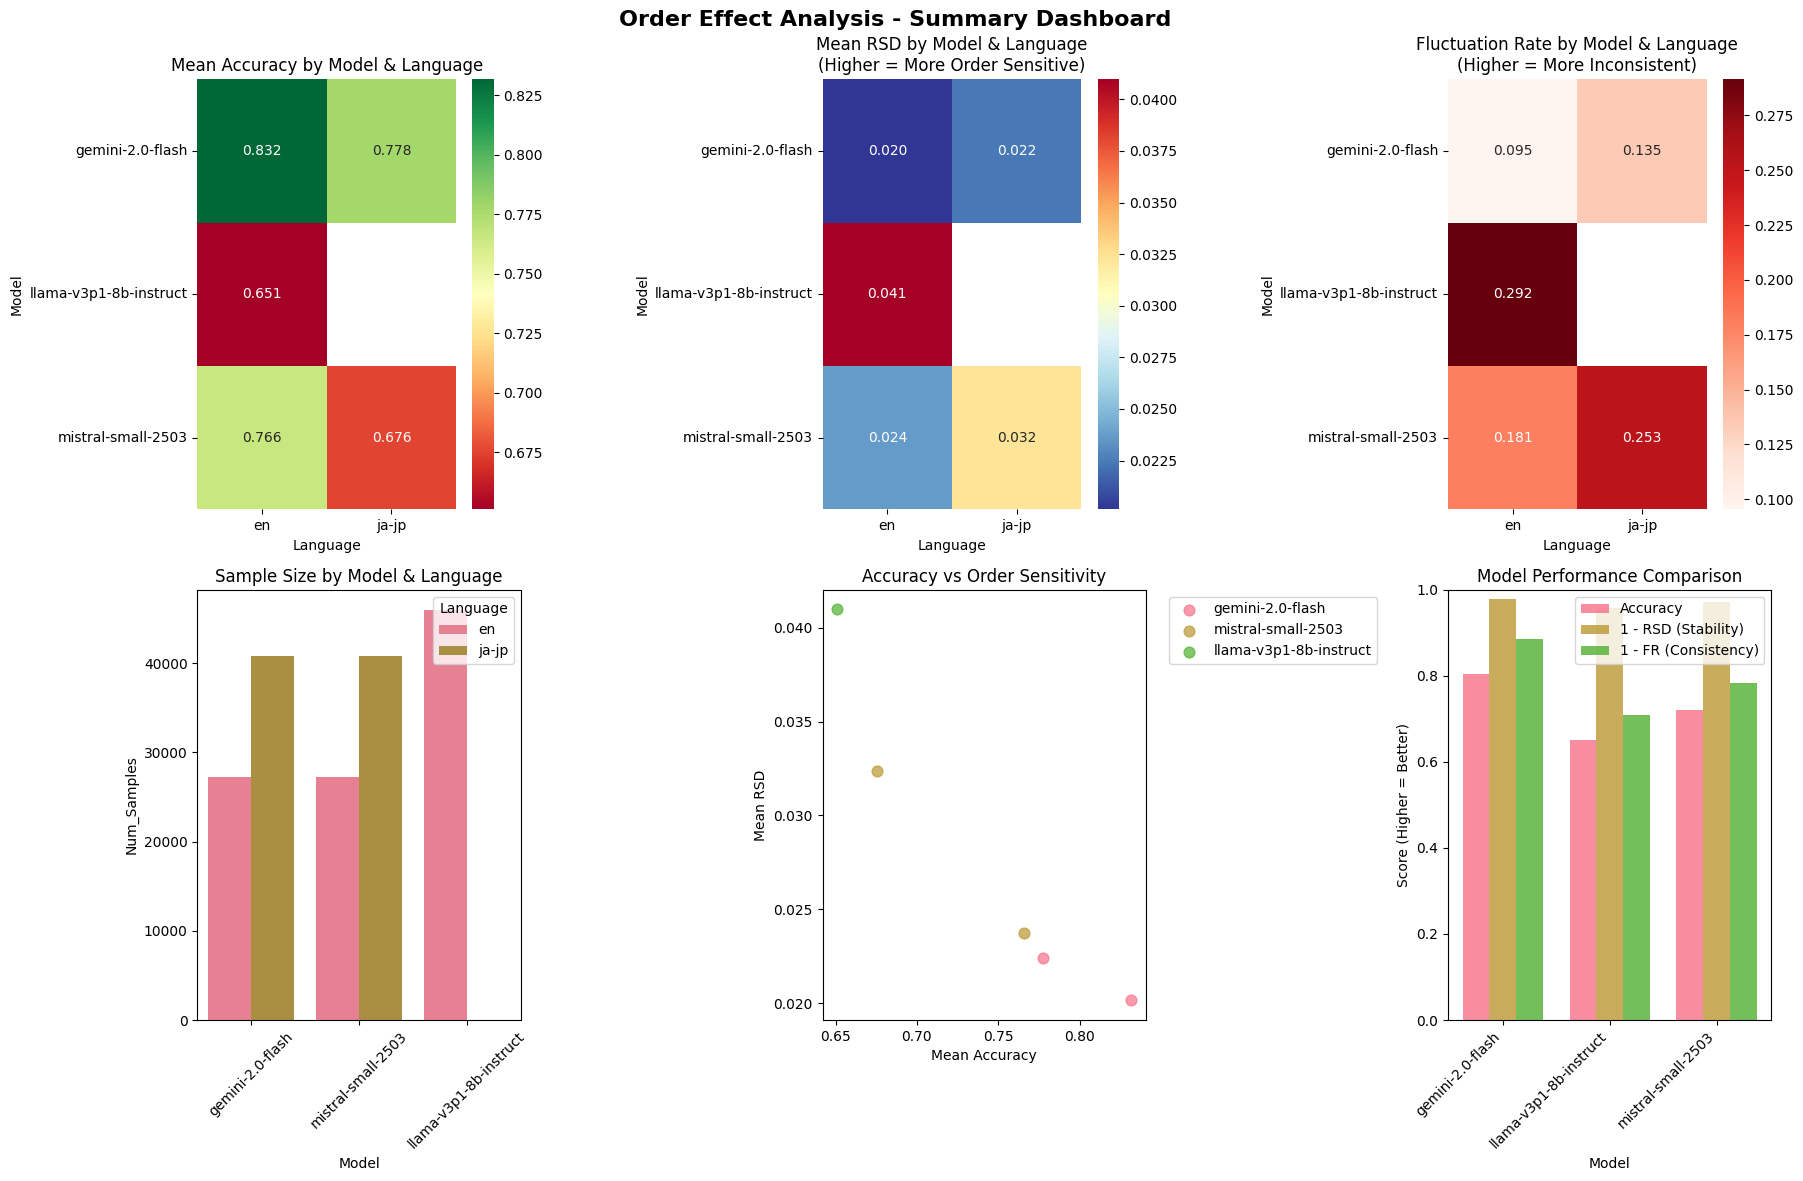

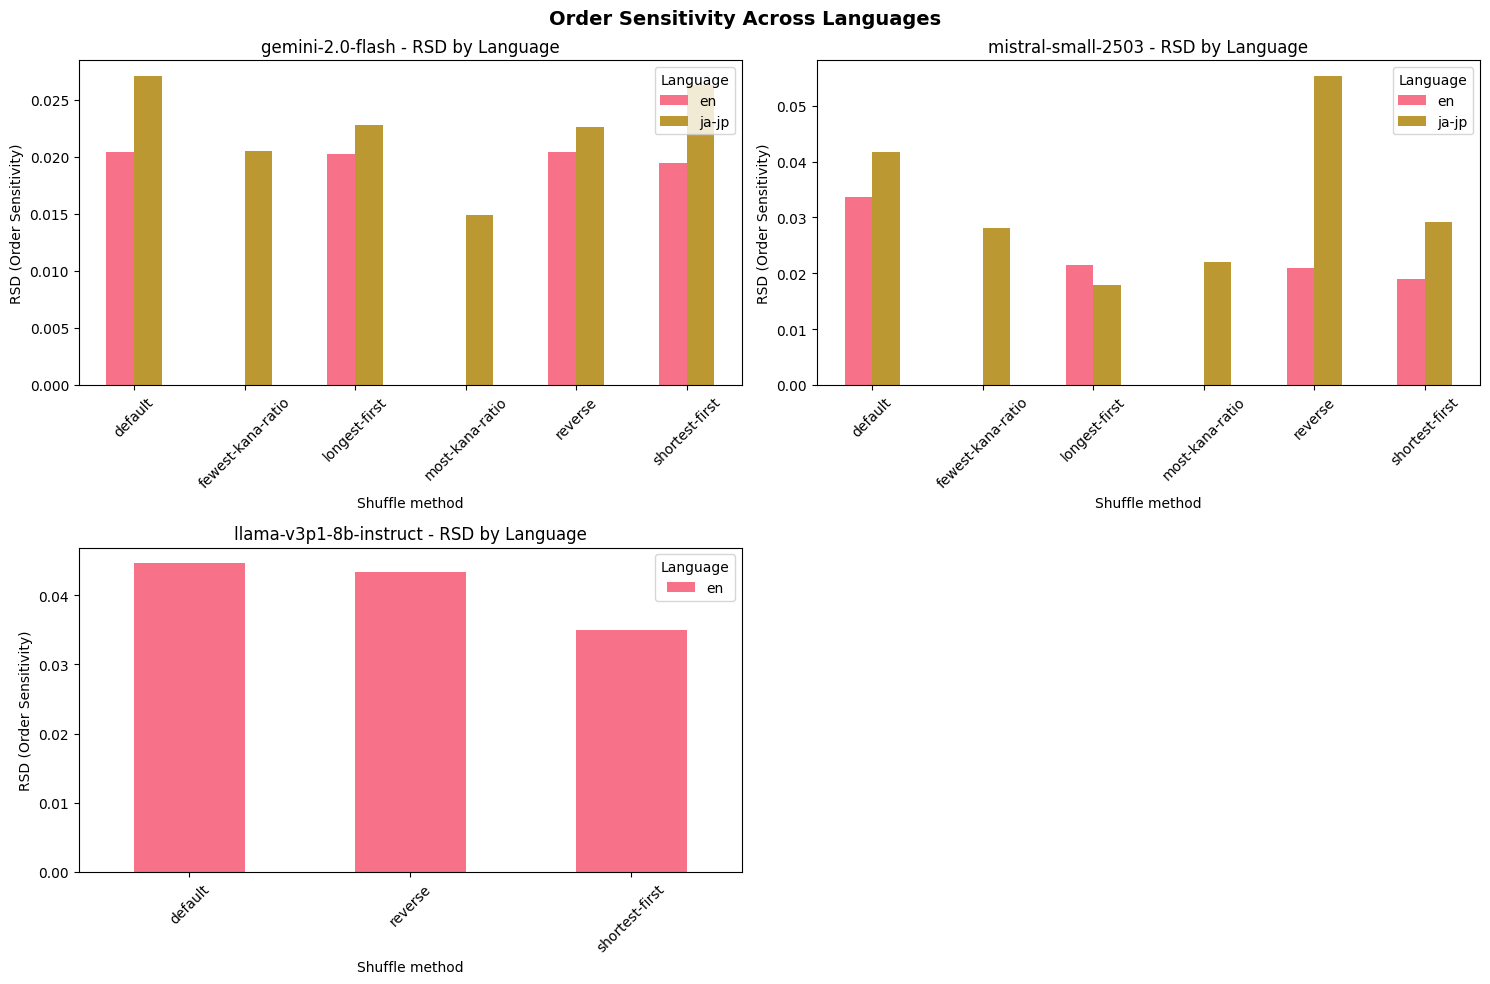

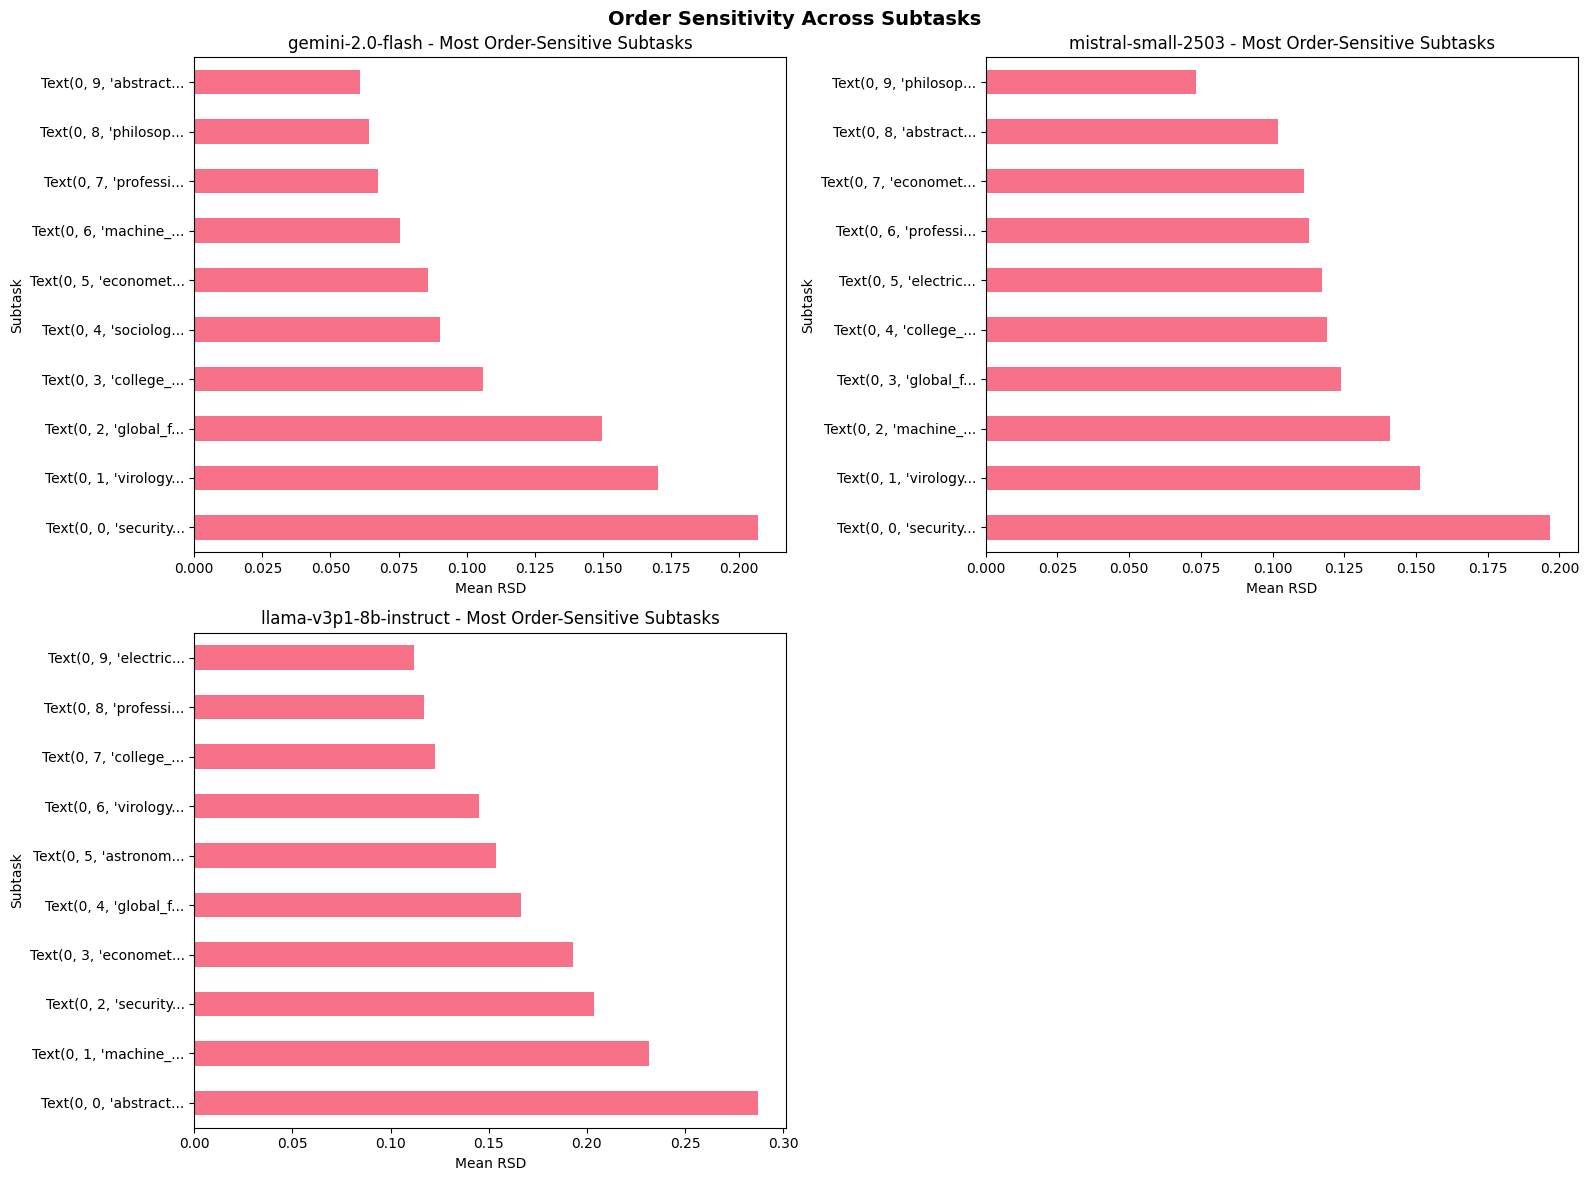

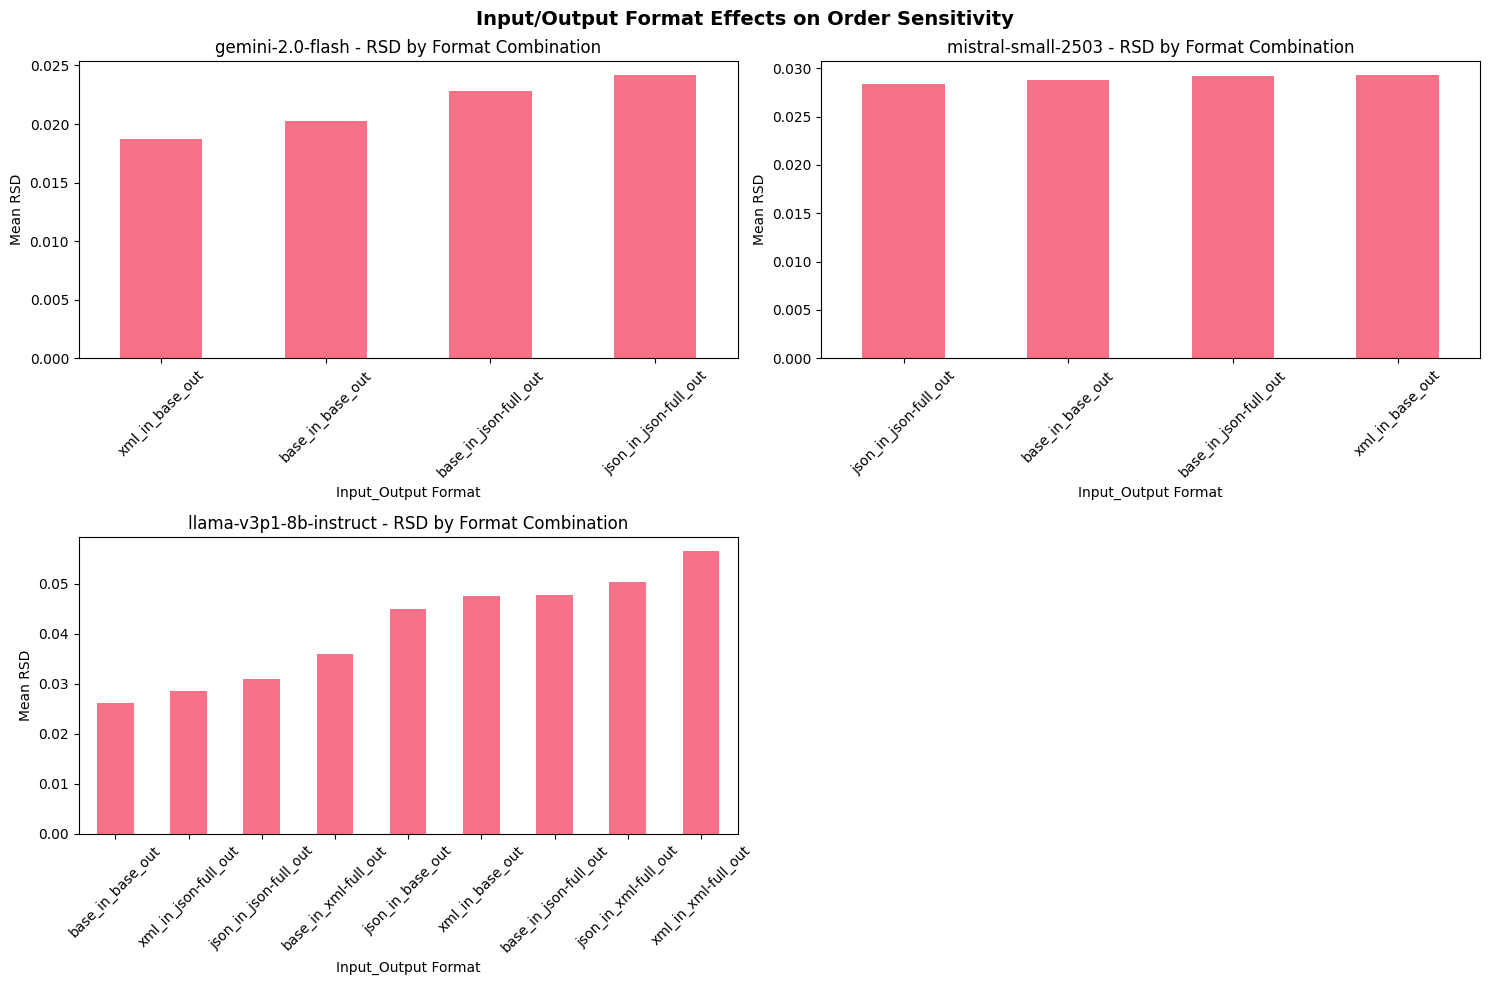

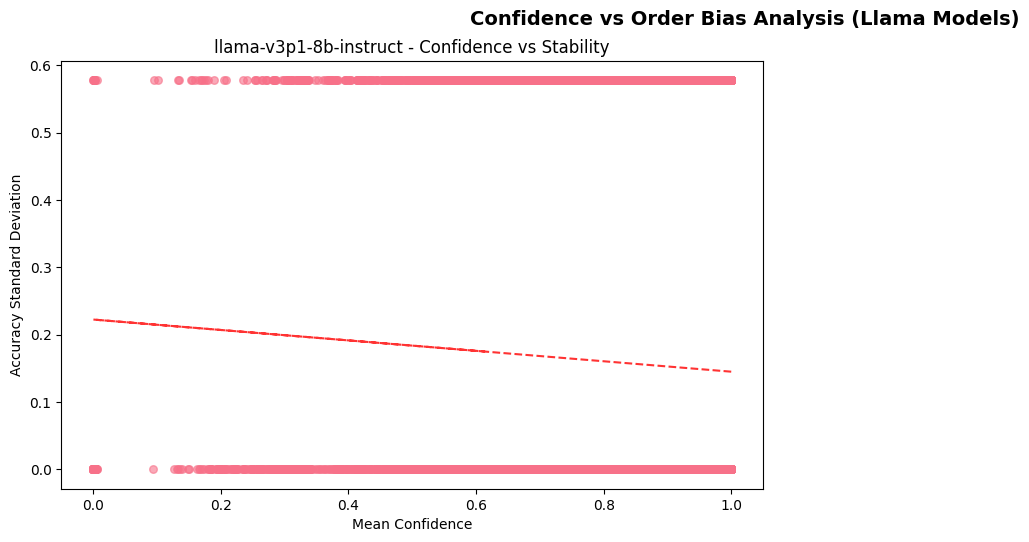

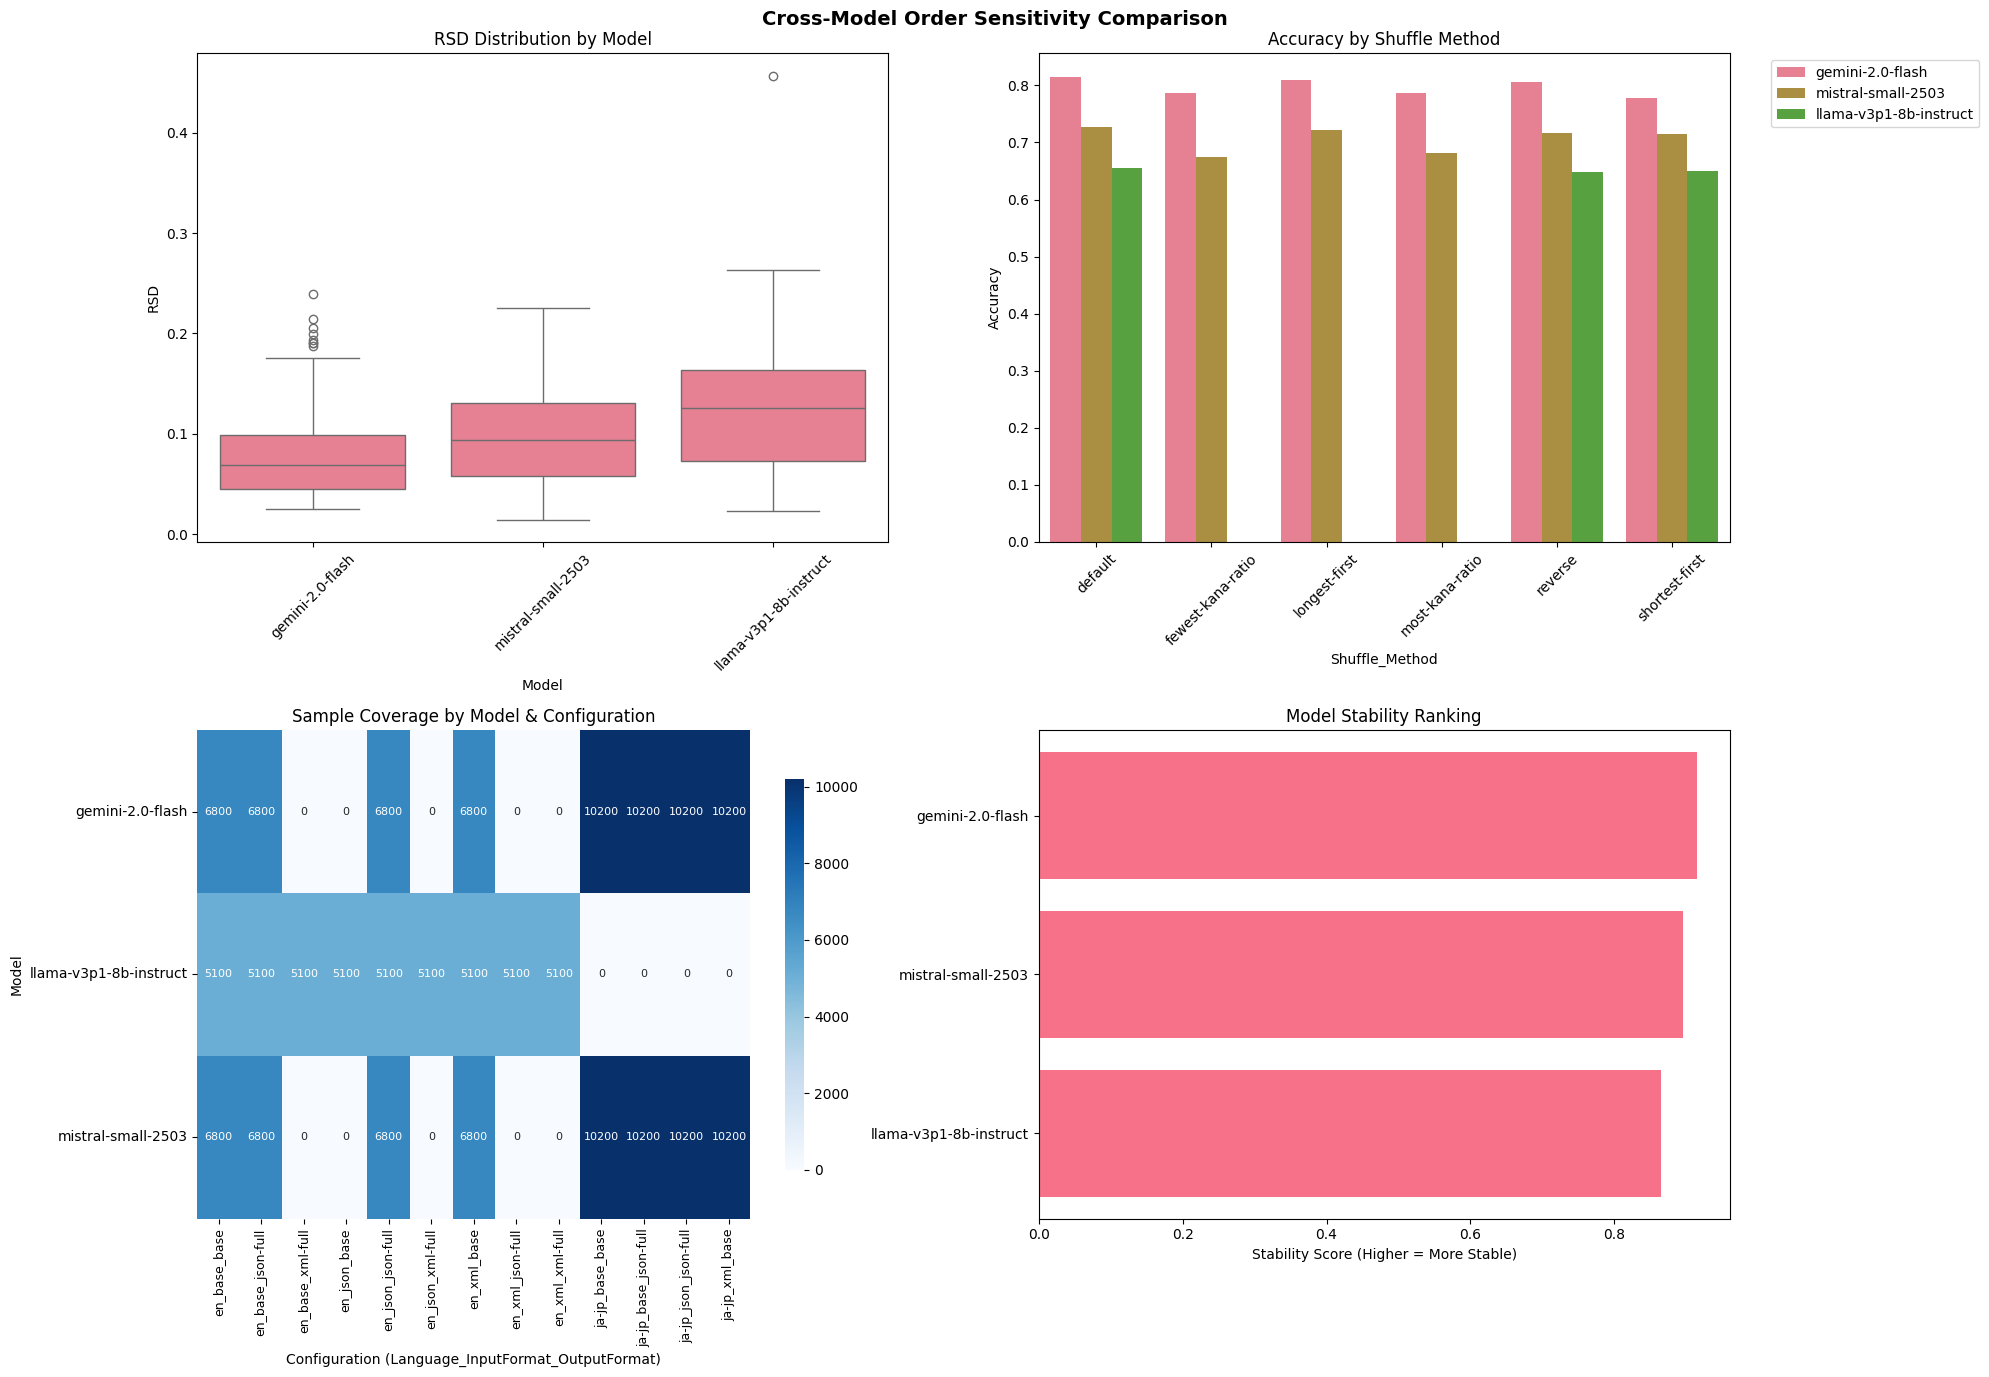

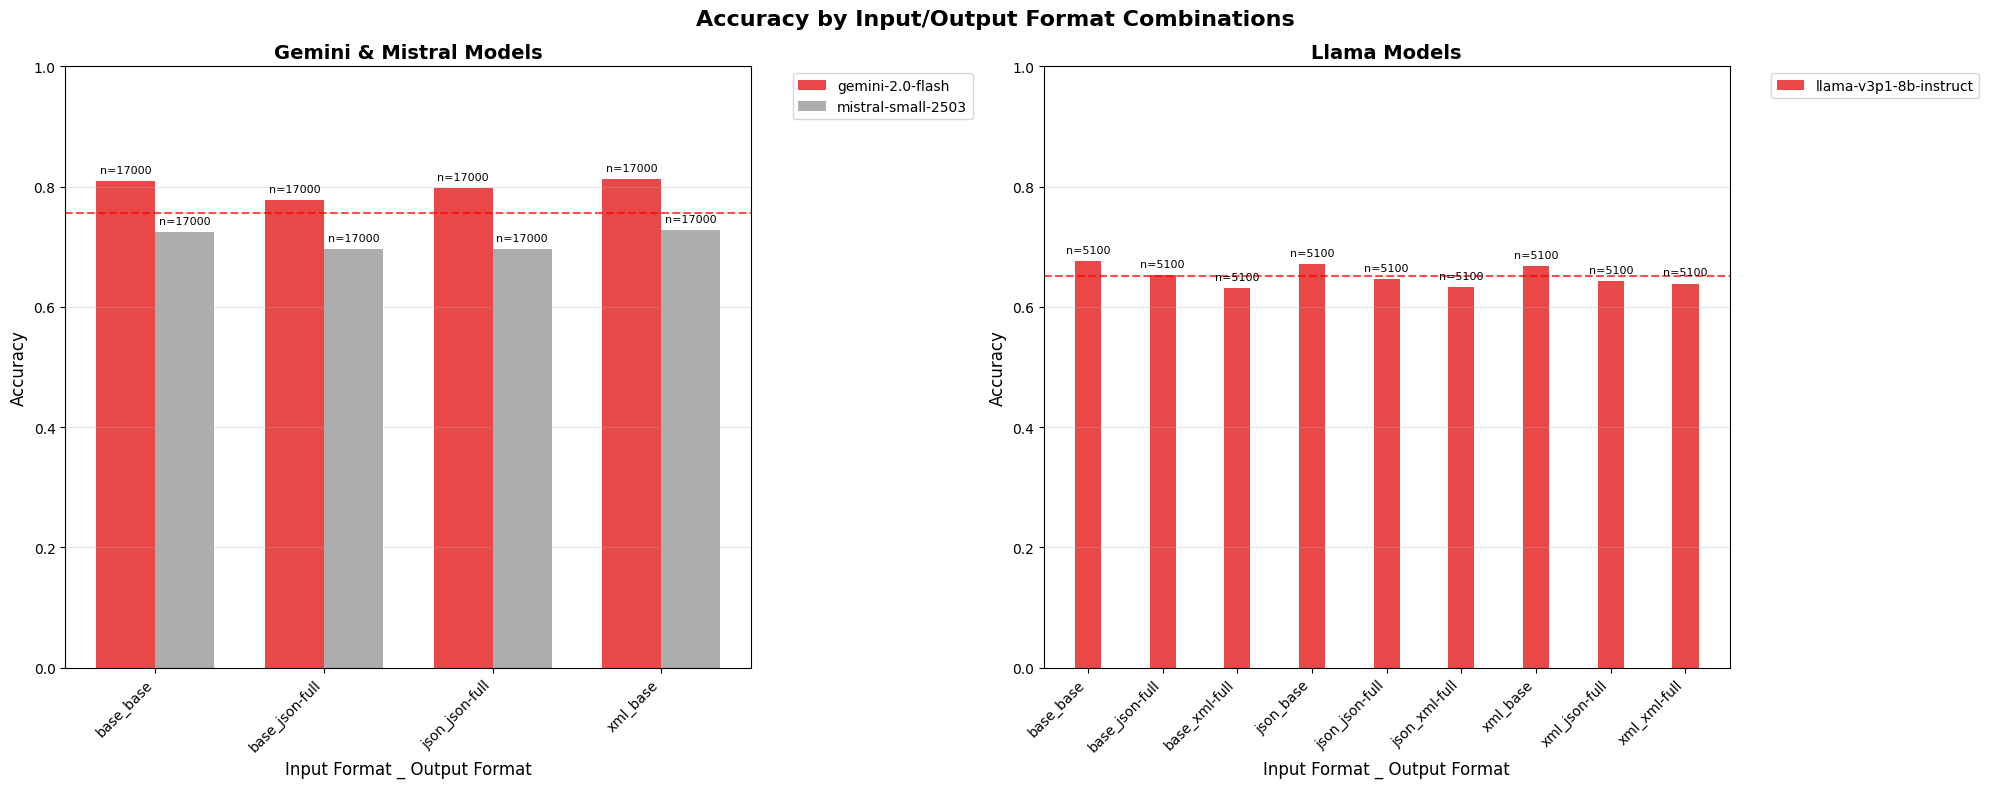

In [24]:
import pandas as pd
import numpy as np
from typing import Dict, List

def run_complete_order_analysis(model_list: List[str]) -> Dict:
    analyzer = OrderEffectAnalyzer(model_list)
    analyzer.load_data()
    
    results = {}
    results['language_sensitivity'] = analyzer.analyze_language_sensitivity()
    results['subtask_sensitivity'] = analyzer.analyze_subtask_sensitivity()
    results['format_effects'] = analyzer.analyze_format_effects()
    results['confidence_bias'] = analyzer.analyze_confidence_bias_relationship()
    results['summary_table'] = analyzer.create_summary_table()
    
    insights = generate_insights(analyzer, results)
    results['insights'] = insights
    
    return analyzer, results

def generate_insights(analyzer, results: Dict) -> Dict:
    insights = {}
    insights['language_effects'] = analyze_language_effects(results.get('language_sensitivity', {}))
    insights['subtask_ranking'] = analyze_subtask_sensitivity_ranking(results.get('subtask_sensitivity', {}))
    insights['format_impact'] = analyze_format_impact(results.get('format_effects', {}))
    insights['model_ranking'] = analyze_model_robustness(results.get('summary_table'))
    insights['confidence_relationship'] = analyze_confidence_relationship(results.get('confidence_bias', {}))
    
    return insights

def analyze_language_effects(lang_results: Dict) -> Dict:
    effects = {
        'cross_lingual_comparison': {},
        'language_bias_magnitude': {},
        'recommendations': []
    }
    
    for model, data in lang_results.items():
        if 'rsd' not in data or data['rsd'].empty:
            continue
            
        rsd_series = data['rsd']
        
        if isinstance(rsd_series.index, pd.MultiIndex) and 'Language' in rsd_series.index.names:
            lang_comparison = rsd_series.groupby('Language').mean()
            
            if 'en' in lang_comparison.index and 'ja-jp' in lang_comparison.index:
                en_rsd = lang_comparison['en']
                jp_rsd = lang_comparison['ja-jp']
                
                effects['cross_lingual_comparison'][model] = {
                    'english_rsd': en_rsd,
                    'japanese_rsd': jp_rsd,
                    'difference': jp_rsd - en_rsd,
                    'relative_increase': ((jp_rsd - en_rsd) / en_rsd * 100) if en_rsd > 0 else 0
                }
                
                if jp_rsd > en_rsd * 1.1:
                    effects['recommendations'].append(
                        f"{model}: Japanese shows {jp_rsd/en_rsd:.1f}x higher order sensitivity than English"
                    )
        else:
            mean_rsd = rsd_series.mean()
            effects['language_bias_magnitude'][model] = mean_rsd
    
    return effects

def analyze_subtask_sensitivity_ranking(subtask_results: Dict) -> Dict:
    ranking = {
        'most_sensitive': {},
        'least_sensitive': {},
        'reasoning_tasks': {},
        'recommendations': []
    }
    
    all_subtask_rsd = {}
    
    for model, data in subtask_results.items():
        if 'rsd' not in data or data['rsd'].empty:
            continue
            
        rsd_series = data['rsd']
        
        if isinstance(rsd_series.index, pd.MultiIndex) and 'Subtask' in rsd_series.index.names:
            subtask_rsd = rsd_series.groupby('Subtask').mean().sort_values(ascending=False)
        else:
            subtask_rsd = rsd_series.sort_values(ascending=False)
        
        if len(subtask_rsd) > 0:
            ranking['most_sensitive'][model] = subtask_rsd.head(5).to_dict()
            ranking['least_sensitive'][model] = subtask_rsd.tail(5).to_dict()
            
            for subtask, rsd in subtask_rsd.items():
                if subtask not in all_subtask_rsd:
                    all_subtask_rsd[subtask] = []
                all_subtask_rsd[subtask].append(rsd)
    
    if all_subtask_rsd:
        avg_rsd_by_subtask = {
            subtask: np.mean(rsds) for subtask, rsds in all_subtask_rsd.items()
        }
        sorted_subtasks = sorted(avg_rsd_by_subtask.items(), key=lambda x: x[1], reverse=True)
        
        ranking['overall_most_sensitive'] = sorted_subtasks[:10]
        ranking['overall_least_sensitive'] = sorted_subtasks[-10:]
        
        reasoning_keywords = ['math', 'logic', 'reasoning', 'algebra', 'geometry', 'calculus']
        reasoning_tasks = [
            (task, rsd) for task, rsd in sorted_subtasks 
            if any(keyword in str(task).lower() for keyword in reasoning_keywords)
        ]
        ranking['reasoning_tasks']['all'] = reasoning_tasks
        
        if reasoning_tasks:
            avg_reasoning_rsd = np.mean([rsd for _, rsd in reasoning_tasks])
            avg_all_rsd = np.mean(list(avg_rsd_by_subtask.values()))
            
            ranking['recommendations'].append(
                f"Reasoning tasks show {'lower' if avg_reasoning_rsd < avg_all_rsd else 'higher'} "
                f"order sensitivity (RSD: {avg_reasoning_rsd:.3f} vs {avg_all_rsd:.3f})"
            )
    
    return ranking

def analyze_format_impact(format_results: Dict) -> Dict:
    impact = {
        'format_comparison': {},
        'structured_vs_base': {},
        'recommendations': []
    }
    
    for model, data in format_results.items():
        if 'rsd' not in data or data['rsd'].empty:
            continue
            
        rsd_series = data['rsd']
        
        if isinstance(rsd_series.index, pd.MultiIndex):
            level_names = rsd_series.index.names
            if 'Input format' in level_names and 'Output format' in level_names:
                rsd_df = rsd_series.reset_index()
                rsd_df['Format_Combo'] = (
                    rsd_df['Input format'] + '_' + rsd_df['Output format']
                )
                
                format_rsd = rsd_df.groupby('Format_Combo')[rsd_series.name if rsd_series.name else 'RSD'].mean()
                impact['format_comparison'][model] = format_rsd.to_dict()
                
                base_rsd = format_rsd.get('base_base', np.nan)
                structured_formats = [f for f in format_rsd.index if 'json' in f or 'xml' in f]
                
                if structured_formats and not np.isnan(base_rsd):
                    structured_rsd = format_rsd[structured_formats].mean()
                    
                    impact['structured_vs_base'][model] = {
                        'base_rsd': base_rsd,
                        'structured_rsd': structured_rsd,
                        'improvement': (base_rsd - structured_rsd) / base_rsd * 100 if base_rsd > 0 else 0
                    }
                    
                    if structured_rsd < base_rsd * 0.9:
                        impact['recommendations'].append(
                            f"{model}: Structured formats reduce order sensitivity by "
                            f"{(base_rsd - structured_rsd)/base_rsd*100:.1f}%"
                        )
        else:
            mean_rsd = rsd_series.mean()
            impact['format_comparison'][model] = {'overall': mean_rsd}
    
    return impact

def analyze_model_robustness(summary_table) -> Dict:
    ranking = {
        'robustness_scores': {},
        'detailed_comparison': {},
        'recommendations': []
    }
    
    if summary_table is None or summary_table.empty:
        return ranking
    
    model_scores = {}
    
    for model in summary_table['Model'].unique():
        model_data = summary_table[summary_table['Model'] == model]
        
        mean_accuracy = model_data['Mean_Accuracy'].mean()
        stability_score = 1 / (1 + model_data['Mean_RSD'].mean()) if not model_data['Mean_RSD'].isna().all() else 0.5
        consistency_score = 1 - model_data['Fluctuation_Rate'].mean() if not model_data['Fluctuation_Rate'].isna().all() else 0.5
        
        robustness_score = (0.4 * mean_accuracy + 0.3 * stability_score + 0.3 * consistency_score)
        
        model_scores[model] = {
            'accuracy': mean_accuracy,
            'stability': stability_score,
            'consistency': consistency_score,
            'overall_robustness': robustness_score
        }
    
    sorted_models = sorted(model_scores.items(), key=lambda x: x[1]['overall_robustness'], reverse=True)
    
    ranking['robustness_scores'] = dict(sorted_models)
    ranking['detailed_comparison'] = model_scores
    
    if sorted_models:
        best_model = sorted_models[0][0]
        worst_model = sorted_models[-1][0]
        
        ranking['recommendations'].extend([
            f"Most robust model: {best_model} (score: {sorted_models[0][1]['overall_robustness']:.3f})",
            f"Least robust model: {worst_model} (score: {sorted_models[-1][1]['overall_robustness']:.3f})"
        ])
    
    return ranking

def analyze_confidence_relationship(confidence_results: Dict) -> Dict:
    relationship = {
        'correlations': {},
        'confidence_patterns': {},
        'recommendations': []
    }
    
    for model, data in confidence_results.items():
        if 'confidence_analysis' not in data or data['confidence_analysis'].empty:
            continue
            
        conf_df = data['confidence_analysis']
        
        if 'mean_confidence' in conf_df.columns and 'accuracy_std' in conf_df.columns:
            clean_data = conf_df[['mean_confidence', 'accuracy_std']].dropna()
            
            if len(clean_data) > 3:
                correlation = clean_data['mean_confidence'].corr(clean_data['accuracy_std'])
                relationship['correlations'][model] = correlation
                
                if correlation < -0.3:
                    relationship['recommendations'].append(
                        f"{model}: Strong negative correlation between confidence and instability "
                        f"(r={correlation:.3f}) - high confidence predicts stability"
                    )
                elif correlation > 0.3:
                    relationship['recommendations'].append(
                        f"{model}: Strong positive correlation between confidence and instability "
                        f"(r={correlation:.3f}) - high confidence may indicate overconfidence"
                    )
    
    return relationship

def print_comprehensive_report(results: Dict):
    print("ORDER SENSITIVITY ANALYSIS REPORT")
    
    insights = results.get('insights', {})
    summary_table = results.get('summary_table')
    
    if summary_table is not None and not summary_table.empty:
        total_samples = summary_table['Num_Samples'].sum()
        models_tested = summary_table['Model'].nunique()
        languages_tested = summary_table['Language'].nunique()
        
        print(f"Total samples: {total_samples:,}")
        print(f"Models tested: {models_tested}")
        print(f"Languages tested: {languages_tested}")
        print(f"Average accuracy: {summary_table['Mean_Accuracy'].mean():.3f}")
        print(f"Average order sensitivity (RSD): {summary_table['Mean_RSD'].mean():.3f}")
    
    all_recommendations = []
    for category, data in insights.items():
        if isinstance(data, dict) and 'recommendations' in data:
            all_recommendations.extend(data['recommendations'])
    
    if all_recommendations:
        print("\nKey Findings:")
        for i, rec in enumerate(all_recommendations, 1):
            print(f"{i}. {rec}")
    
    if summary_table is not None and not summary_table.empty:
        print(f"\nSummary Table:\n{summary_table.round(4).to_string()}")

def main():
    model_list = ['gemini-2.0-flash', 'mistral-small-2503', 'llama-v3p1-8b-instruct']
    
    analyzer, results = run_complete_order_analysis(model_list)
    print_comprehensive_report(results)
    
    visualizer = OrderEffectVisualizer(analyzer, results['summary_table'])
    plots = visualizer.generate_all_plots()
    
    return analyzer, results

analyzer, results = main()